# House Price Prediction

#### Step 1: Reading And Understanding Data


In [2]:
# Import Libraries 

import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

# Import Libraries for EDA

import seaborn as sns
import matplotlib
import plotly.graph_objs as go
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

import os

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Will create the separator for better data visualization among each variable
def Line_Separator():
    print('*'*50, '\n')
    
def Line_Separator1():
    print('*'*100, '\n')

In [5]:
class datastyle:
   start = '\033[1m'
   end = '\033[0m'

In [6]:
# Import file, read and review the data 
df = pd.read_csv('train.csv')
df.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
# Check the number of columns and rows
Number_of_raw = df.shape[0]
Number_of_column = df.shape[1]

print(datastyle.start+'Number of raws in housing dataset of the Australian market    :'+ datastyle.end, Number_of_raw)
print(datastyle.start+'Number of columns in housing dataset of the Australian market :'+ datastyle.end, Number_of_column); Line_Separator()

Number of raws in housing dataset of the Australian market    : 1460
Number of columns in housing dataset of the Australian market : 81
************************************************** 



In [8]:
# Check the number of catogrical and numerical features
def data_features (data):
    categorical_features = df.select_dtypes(exclude = [np.number]).columns
    numerical_features = df.select_dtypes(include = [np.number]).columns
    print(datastyle.start+"Categorical features :\n \n"+ datastyle.end,categorical_features); Line_Separator1()
    print(datastyle.start+"Numerical features:\n \n"+ datastyle.end,numerical_features)
print(data_features(df))

Categorical features :
 
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
**************************************************************************************************** 

Numerical features:
 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'T

In [9]:
# Check missing values and types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
# Identify the missing value in precentage
print(datastyle.start+"Missing values in Percentage :\n"+ datastyle.end); Line_Separator()
percent_missing_housing_data_of_Australian_market =round(100*(df.isnull()).sum()/len(df), 2)
percent_missing_housing_data_of_Australian_market.sort_values(ascending=False)

Missing values in Percentage :

************************************************** 



PoolQC         99.52
MiscFeature    96.30
Alley          93.77
Fence          80.75
FireplaceQu    47.26
               ...  
ExterQual       0.00
Exterior2nd     0.00
Exterior1st     0.00
RoofMatl        0.00
SalePrice       0.00
Length: 81, dtype: float64

We have detected missing values in a total of 16 variables, consisting of both categorical and numerical data. In order to address this issue, we will analyze each categorical variable individually and apply appropriate treatments to handle the missing values.

Let's examine the presence of null values in each categorical variable by referring to the data definition provided, addressing them one column at a time.

In [11]:
# Non categorical columns detailed study

print(datastyle.start+'1.  PoolQC       :'+ datastyle.end)
print(df['PoolQC'].describe()); Line_Separator()

print(datastyle.start+'2.  MiscFeature  :'+ datastyle.end)
print(df['MiscFeature'].describe()); Line_Separator()

print(datastyle.start+'3.  Alley        :'+ datastyle.end)
print(df['Alley'].describe()); Line_Separator()

print(datastyle.start+'4.  Fence        :'+ datastyle.end)
print(df['Fence'].describe()); Line_Separator()

print(datastyle.start+'5.  FireplaceQu  :'+ datastyle.end)
print(df['FireplaceQu'].describe()); Line_Separator()

print(datastyle.start+'6.  GarageCond   :'+ datastyle.end)
print(df['GarageCond'].describe()); Line_Separator()

print(datastyle.start+'7.  GarageType   :'+ datastyle.end)
print(df['GarageType'].describe()); Line_Separator()

print(datastyle.start+'8.  GarageFinish :'+ datastyle.end)
print(df['GarageFinish'].describe()); Line_Separator()

print(datastyle.start+'9.  GarageQual   :'+ datastyle.end)
print(df['GarageQual'].describe()); Line_Separator()

print(datastyle.start+'10. BsmtExposure :'+ datastyle.end)
print(df['BsmtExposure'].describe()); Line_Separator() 

print(datastyle.start+'11. BsmtFinType2 :'+ datastyle.end)
print(df['BsmtFinType2'].describe()); Line_Separator()

print(datastyle.start+'12. BsmtFinType1 :'+ datastyle.end)
print(df['BsmtFinType1'].describe()); Line_Separator()

print(datastyle.start+'13. BsmtCond     :'+ datastyle.end)
print(df['BsmtCond'].describe()); Line_Separator()

print(datastyle.start+'14. BsmtQual     :'+ datastyle.end)
print(df['BsmtQual'].describe()); Line_Separator()

print(datastyle.start+'15. MasVnrType   :'+ datastyle.end)
print(df['MasVnrType'].describe()); Line_Separator()

print(datastyle.start+'16. Electrical   :'+ datastyle.end)
print(df['Electrical'].describe())

1.  PoolQC       :
count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object
************************************************** 

2.  MiscFeature  :
count       54
unique       4
top       Shed
freq        49
Name: MiscFeature, dtype: object
************************************************** 

3.  Alley        :
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
************************************************** 

4.  Fence        :
count       281
unique        4
top       MnPrv
freq        157
Name: Fence, dtype: object
************************************************** 

5.  FireplaceQu  :
count     770
unique      5
top        Gd
freq      380
Name: FireplaceQu, dtype: object
************************************************** 

6.  GarageCond   :
count     1379
unique       5
top         TA
freq      1326
Name: GarageCond, dtype: object
************************************************** 

7.  GarageType   :
count       1379


In [12]:
# We will conduct a detailed analysis of the non-categorical columns, examining each one thoroughly to understand the nature and distribution of missing values in these variables.

print(datastyle.start+'1.  PoolQC       :'+ datastyle.end, df['PoolQC'].unique())
print(datastyle.start+'2.  MiscFeature  :'+ datastyle.end, df['MiscFeature'].unique())
print(datastyle.start+'3.  Alley        :'+ datastyle.end, df['Alley'].unique())
print(datastyle.start+'4.  Fence        :'+ datastyle.end, df['Fence'].unique())
print(datastyle.start+'5.  FireplaceQu  :'+ datastyle.end, df['FireplaceQu'].unique())
print(datastyle.start+'6.  GarageCond   :'+ datastyle.end, df['GarageCond'].unique())
print(datastyle.start+'7.  GarageType   :'+ datastyle.end, df['GarageType'].unique())
print(datastyle.start+'8.  GarageFinish :'+ datastyle.end, df['GarageFinish'].unique())
print(datastyle.start+'9.  GarageQual   :'+ datastyle.end, df['GarageQual'].unique())
print(datastyle.start+'10. BsmtExposure :'+ datastyle.end, df['BsmtExposure'].unique())    
print(datastyle.start+'11. BsmtFinType2 :'+ datastyle.end, df['BsmtFinType2'].unique())
print(datastyle.start+'12. BsmtFinType1 :'+ datastyle.end, df['BsmtFinType1'].unique())
print(datastyle.start+'13. BsmtCond     :'+ datastyle.end, df['BsmtCond'].unique())
print(datastyle.start+'14. BsmtQual     :'+ datastyle.end, df['BsmtQual'].unique())
print(datastyle.start+'15. MasVnrType   :'+ datastyle.end, df['MasVnrType'].unique())
print(datastyle.start+'16. Electrical   :'+ datastyle.end, df['Electrical'].unique())

1.  PoolQC       : [nan 'Ex' 'Fa' 'Gd']
2.  MiscFeature  : [nan 'Shed' 'Gar2' 'Othr' 'TenC']
3.  Alley        : [nan 'Grvl' 'Pave']
4.  Fence        : [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
5.  FireplaceQu  : [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
6.  GarageCond   : ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
7.  GarageType   : ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
8.  GarageFinish : ['RFn' 'Unf' 'Fin' nan]
9.  GarageQual   : ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
10. BsmtExposure : ['No' 'Gd' 'Mn' 'Av' nan]
11. BsmtFinType2 : ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
12. BsmtFinType1 : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
13. BsmtCond     : ['TA' 'Gd' nan 'Fa' 'Po']
14. BsmtQual     : ['Gd' 'TA' 'Ex' nan 'Fa']
15. MasVnrType   : ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
16. Electrical   : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]


In [13]:
# Replace the categorical name, especially "nan."

# 1. PoolQC --- Nan = No Pool
print(datastyle.start+"1."+ datastyle.end,"Replaced Nan data from PoolQC to No Pool")
def replace_name(x,y):
    df['PoolQC'].replace(x,y, inplace=True)

replace_name(np.nan,'No Pool')


# 2. MiscFeature and 15. MasVnrType----- Nan = none 

print(datastyle.start+"2."+ datastyle.end, "Replaced Nan data from MiscFeature &  MasVnrType to none")
def replace_name(x,y):
    df['MiscFeature'].replace(x,y, inplace=True)
    df['MasVnrType'].replace(x,y, inplace=True)

replace_name(np.nan,'None')

# 3. Alley --- Nan = No Alley
print(datastyle.start+"3."+ datastyle.end,"Replaced Nan data from Alley to No Alley")
def replace_name(x,y):
    df['Alley'].replace(x,y, inplace=True)

replace_name(np.nan,'No Alley')

# 4. Fence --- Nan = No Fence
print(datastyle.start+"4."+ datastyle.end, "Replaced Nan data from Fence to No Fence")
def replace_name(x,y):
    df['Fence'].replace(x,y, inplace=True)

replace_name(np.nan,'No Fence')

# 5. FireplaceQu --- Nan = No Fireplace
print(datastyle.start+"5."+ datastyle.end,"Replaced Nan data from FireplaceQu to No Fireplace")
def replace_name(x,y):
    df['FireplaceQu'].replace(x,y, inplace=True)

replace_name(np.nan,'No Fireplace')

# 6. GarageCond , 7.GarageType, 8.GarageFinish, 9.GarageQual----- Nan = No Garage
print(datastyle.start+"6."+ datastyle.end, "Replaced Nan data from GarageCond, GarageType, GarageFinish,& GarageQual to No Garage")
def replace_name(x,y):
    df['GarageCond'].replace(x,y, inplace=True)
    df['GarageType'].replace(x,y, inplace=True)
    df['GarageFinish'].replace(x,y, inplace=True)
    df['GarageQual'].replace(x,y, inplace=True)

replace_name(np.nan,'No Garage')

# 10. BsmtExposure ,11. BsmtFinType2, 12. BsmtFinType1, 13. BsmtCond, 14.BsmtQual----- Nan = No Basement
print(datastyle.start+"7."+ datastyle.end,"Replaced Nan data from BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond & BsmtQual to No Basement")
def replace_name(x,y):
    df['BsmtExposure'].replace(x,y, inplace=True)
    df['BsmtFinType2'].replace(x,y, inplace=True)
    df['BsmtFinType1'].replace(x,y, inplace=True)
    df['BsmtCond'].replace(x,y, inplace=True)
    df['BsmtQual'].replace(x,y, inplace=True)

replace_name(np.nan,'No Basement')

# 16. Electrical----- Nan = unknown
print(datastyle.start+"8."+ datastyle.end, "Replaced Nan data from Electrical to unknown")
def replace_name(x,y):
    df['Electrical'].replace(x,y, inplace=True)
    

replace_name(np.nan,'Uknown')

1. Replaced Nan data from PoolQC to No Pool
2. Replaced Nan data from MiscFeature &  MasVnrType to none
3. Replaced Nan data from Alley to No Alley
4. Replaced Nan data from Fence to No Fence
5. Replaced Nan data from FireplaceQu to No Fireplace
6. Replaced Nan data from GarageCond, GarageType, GarageFinish,& GarageQual to No Garage
7. Replaced Nan data from BsmtExposure, BsmtFinType2, BsmtFinType1, BsmtCond & BsmtQual to No Basement
8. Replaced Nan data from Electrical to unknown


In [14]:
# After replacing the NaN values, let's review the updated dataset to ensure that the missing values have been properly addressed and the data is now complete.
print(datastyle.start+'1.  PoolQC       :'+ datastyle.end, df['PoolQC'].unique())
print(datastyle.start+'2.  MiscFeature  :'+ datastyle.end, df['MiscFeature'].unique())
print(datastyle.start+'3.  Alley        :'+ datastyle.end, df['Alley'].unique())
print(datastyle.start+'4.  Fence        :'+ datastyle.end, df['Fence'].unique())
print(datastyle.start+'5.  FireplaceQu  :'+ datastyle.end, df['FireplaceQu'].unique())
print(datastyle.start+'6.  GarageCond   :'+ datastyle.end, df['GarageCond'].unique())
print(datastyle.start+'7.  GarageType   :'+ datastyle.end, df['GarageType'].unique())
print(datastyle.start+'8.  GarageFinish :'+ datastyle.end, df['GarageFinish'].unique())
print(datastyle.start+'9.  GarageQual   :'+ datastyle.end, df['GarageQual'].unique())
print(datastyle.start+'10. BsmtExposure :'+ datastyle.end, df['BsmtExposure'].unique())    
print(datastyle.start+'11. BsmtFinType2 :'+ datastyle.end, df['BsmtFinType2'].unique())
print(datastyle.start+'12. BsmtFinType1 :'+ datastyle.end, df['BsmtFinType1'].unique())
print(datastyle.start+'13. BsmtCond     :'+ datastyle.end, df['BsmtCond'].unique())
print(datastyle.start+'14. BsmtQual     :'+ datastyle.end, df['BsmtQual'].unique())
print(datastyle.start+'15. MasVnrType   :'+ datastyle.end, df['MasVnrType'].unique())
print(datastyle.start+'16. Electrical   :'+ datastyle.end, df['Electrical'].unique())

1.  PoolQC       : ['No Pool' 'Ex' 'Fa' 'Gd']
2.  MiscFeature  : ['None' 'Shed' 'Gar2' 'Othr' 'TenC']
3.  Alley        : ['No Alley' 'Grvl' 'Pave']
4.  Fence        : ['No Fence' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
5.  FireplaceQu  : ['No Fireplace' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
6.  GarageCond   : ['TA' 'Fa' 'No Garage' 'Gd' 'Po' 'Ex']
7.  GarageType   : ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' 'No Garage' 'Basment' '2Types']
8.  GarageFinish : ['RFn' 'Unf' 'Fin' 'No Garage']
9.  GarageQual   : ['TA' 'Fa' 'Gd' 'No Garage' 'Ex' 'Po']
10. BsmtExposure : ['No' 'Gd' 'Mn' 'Av' 'No Basement']
11. BsmtFinType2 : ['Unf' 'BLQ' 'No Basement' 'ALQ' 'Rec' 'LwQ' 'GLQ']
12. BsmtFinType1 : ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'No Basement' 'LwQ']
13. BsmtCond     : ['TA' 'Gd' 'No Basement' 'Fa' 'Po']
14. BsmtQual     : ['Gd' 'TA' 'Ex' 'No Basement' 'Fa']
15. MasVnrType   : ['BrkFace' 'None' 'Stone' 'BrkCmn']
16. Electrical   : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' 'Uknown']


Once we have handled the missing values in the categorical variables, we will proceed to review the remaining variables that still contain NaN values. The list of these variables is provided below.

In [15]:
# identify missing value
print(datastyle.start+"Missing values in Percentage :\n"+ datastyle.end); Line_Separator()
percent_missing_housing_data_of_Australian_market =round(100*(df.isnull()).sum()/len(df), 2)
percent_missing_housing_data_of_Australian_market.sort_values(ascending=False)

Missing values in Percentage :

************************************************** 



LotFrontage     17.74
GarageYrBlt      5.55
MasVnrArea       0.55
Id               0.00
KitchenAbvGr     0.00
                ...  
ExterQual        0.00
MasVnrType       0.00
Exterior2nd      0.00
Exterior1st      0.00
SalePrice        0.00
Length: 81, dtype: float64

We have identified three numerical variables that contain missing values. We will examine each variable individually and take appropriate actions to address the missing values.

In [16]:
# Nan numerical columns detailed study
print(datastyle.start+'1.  LotFrontage       :'+ datastyle.end)
print(df['LotFrontage'].describe()); Line_Separator()

print(datastyle.start+'2.  GarageYrBlt       :'+ datastyle.end)
print(df['GarageYrBlt'].describe()); Line_Separator()

print(datastyle.start+'3.  MasVnrArea        :'+ datastyle.end)
print(df['MasVnrArea'].describe()); Line_Separator()

1.  LotFrontage       :
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
************************************************** 

2.  GarageYrBlt       :
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
************************************************** 

3.  MasVnrArea        :
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
************************************************** 



In [17]:
print(datastyle.start+'1.  LotFrontage       :'+ datastyle.end)
print(df['LotFrontage'].unique()); Line_Separator1()

print(datastyle.start+'2.  GarageYrBlt       :'+ datastyle.end)
print(df['GarageYrBlt'].unique()); Line_Separator1()

print(datastyle.start+'3.  MasVnrArea        :'+ datastyle.end)
print(df['MasVnrArea'].unique()); Line_Separator1()

1.  LotFrontage       :
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
**************************************************************************************************** 

2.  GarageYrBlt       :
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956.

In [18]:
# Missing value filled with zero 
print(datastyle.start+"Missing Value Filled With Zero:\n"+ datastyle.end)
print(datastyle.start+"LotFrontage: Filled empty raws with zero:"+ datastyle.end, df["LotFrontage"].fillna(0, inplace=True))
print(datastyle.start+"MasVnrArea : Filled empty raws with zero:"+ datastyle.end, df["MasVnrArea"].fillna(0, inplace=True)); Line_Separator()

# GarageYrBlt median value is 1980 (identity using describe previous steps)
print(datastyle.start+"Replaced nan value from GarageYrBlt with median value of 1980"+ datastyle.end); Line_Separator1()
def replace_name(x,y):
    df['GarageYrBlt'].replace(x,y, inplace=True)
    
replace_name(np.nan,1980)

# Convert the value to int64
print(datastyle.start+"Converted values of LotFrontage, MasVnrArea, & GarageYrBlt to Integer"+ datastyle.end); Line_Separator1()
df['LotFrontage']=df['LotFrontage'].values.astype(np.int64)
df['MasVnrArea']=df['MasVnrArea'].values.astype(np.int64)
df['GarageYrBlt']=df['GarageYrBlt'].values.astype(np.int64)


Missing Value Filled With Zero:

LotFrontage: Filled empty raws with zero: None
MasVnrArea : Filled empty raws with zero: None
************************************************** 

Replaced nan value from GarageYrBlt with median value of 1980
**************************************************************************************************** 

Converted values of LotFrontage, MasVnrArea, & GarageYrBlt to Integer
**************************************************************************************************** 



In [19]:
# identify again if there is any missing value in the dataset
print(datastyle.start+"Missing values in Percentage :\n"+ datastyle.end); Line_Separator()
percent_missing_housing_data_of_Australian_market =round(100*(df.isnull()).sum()/len(df), 2)
percent_missing_housing_data_of_Australian_market.sort_values(ascending=False)

Missing values in Percentage :

************************************************** 



Id             0.0
CentralAir     0.0
GarageYrBlt    0.0
GarageType     0.0
FireplaceQu    0.0
              ... 
MasVnrArea     0.0
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
SalePrice      0.0
Length: 81, dtype: float64

Upon addressing the missing values in both categorical and numerical variables, we have successfully resolved all instances of missing values. Consequently, the dataset now does not contain any missing values.

Let's review the categorical variables for the presence of any outliers and conduct an exploratory data analysis (EDA) specifically focusing on the sales price variable.

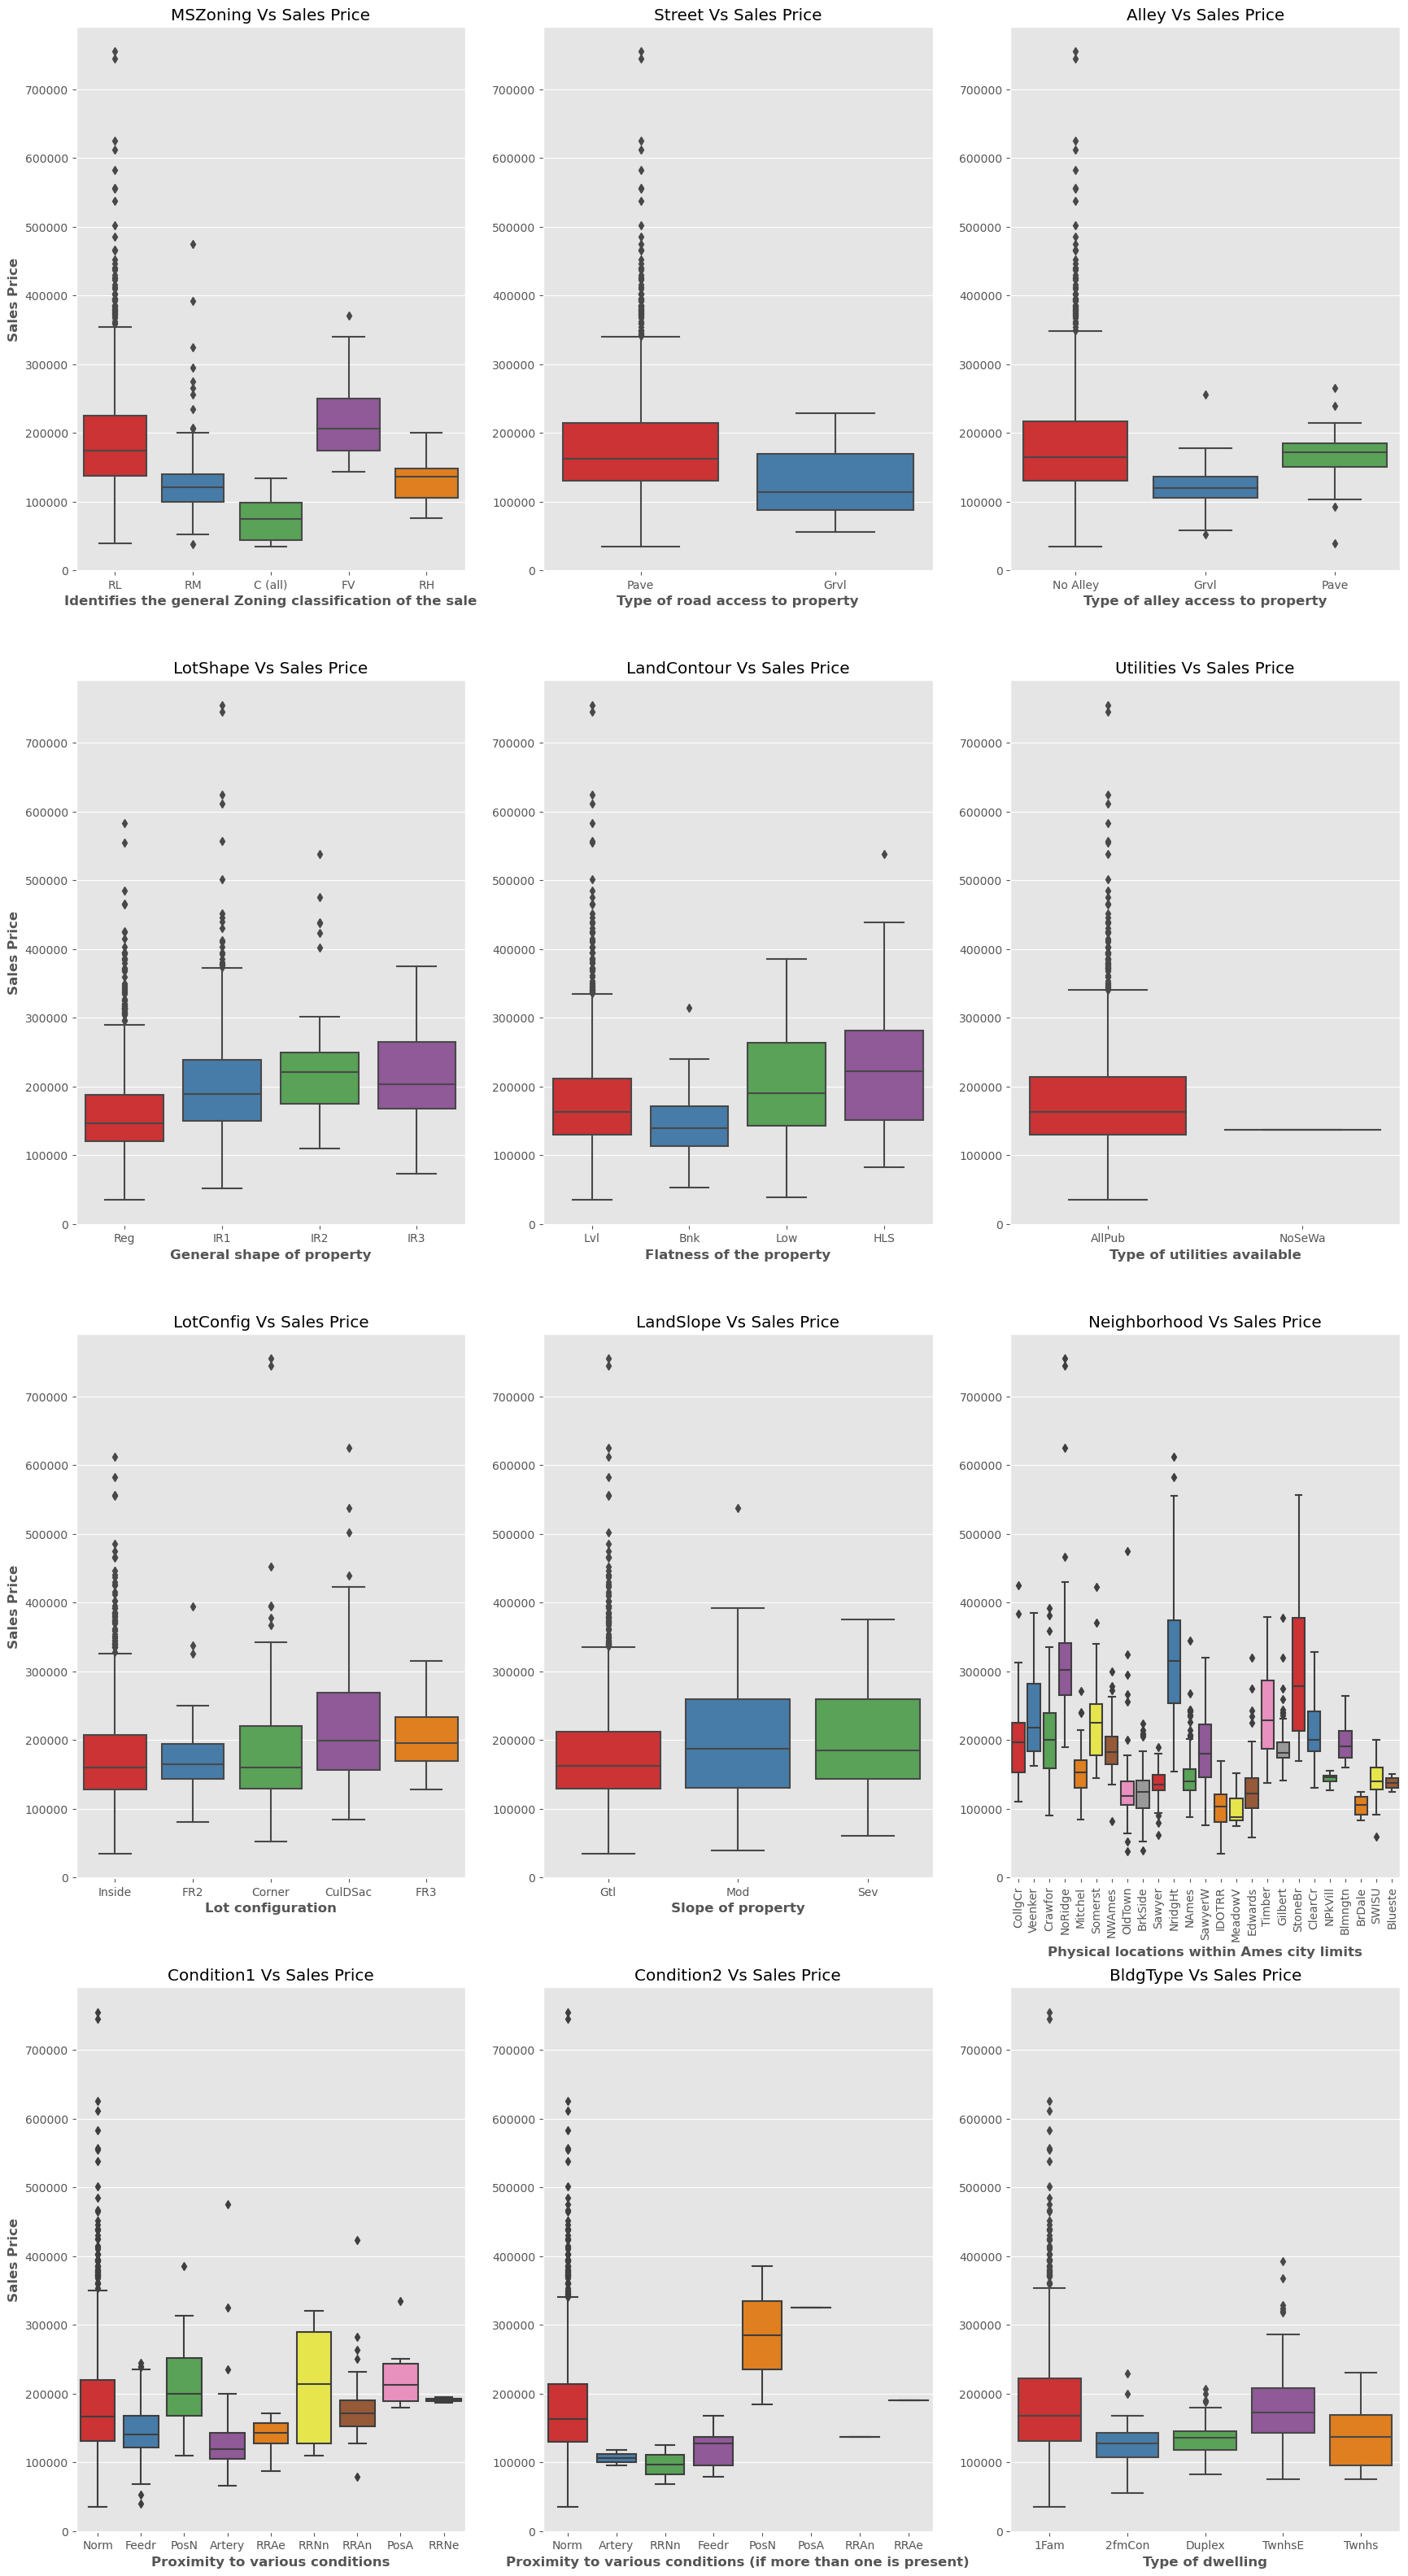

In [20]:
fig = plt.figure(figsize = (21,40))

plt.subplot(431)
sns.boxplot(x='MSZoning',y='SalePrice',data=df, palette="Set1")
plt.title('MSZoning Vs Sales Price')
plt.xlabel('Identifies the general Zoning classification of the sale', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(432)
sns.boxplot(x='Street',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Street Vs Sales Price')
plt.xlabel('Type of road access to property', fontsize=12,fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12,fontweight='bold')


plt.subplot(433)
sns.boxplot(x='Alley',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Alley Vs Sales Price')
plt.xlabel('Type of alley access to property', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(434)
sns.boxplot(x='LotShape',y='SalePrice',data=df, palette="Set1")
plt.title('LotShape Vs Sales Price')
plt.xlabel('General shape of property', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(435)
sns.boxplot(x='LandContour',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('LandContour Vs Sales Price')
plt.xlabel('Flatness of the property', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(436)
sns.boxplot(x='Utilities',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Utilities Vs Sales Price')
plt.xlabel('Type of utilities available', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(437)
sns.boxplot(x='LotConfig',y='SalePrice',data=df, palette="Set1")
plt.title('LotConfig Vs Sales Price')
plt.xlabel('Lot configuration', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(438)
sns.boxplot(x='LandSlope',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('LandSlope Vs Sales Price')
plt.xlabel('Slope of property', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(439)
sns.boxplot(x='Neighborhood',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Neighborhood Vs Sales Price')
plt.xlabel('Physical locations within Ames city limits', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)

plt.subplot(4,3,10)
sns.boxplot(x='Condition1',y='SalePrice',data=df, palette="Set1")
plt.title('Condition1 Vs Sales Price')
plt.xlabel('Proximity to various conditions', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(4,3,11)
sns.boxplot(x='Condition2',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Condition2 Vs Sales Price')
plt.xlabel('Proximity to various conditions (if more than one is present)', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(4,3,12)
sns.boxplot(x='BldgType',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('BldgType Vs Sales Price')
plt.xlabel('Type of dwelling', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')
plt.show()

##### Observation

The first observation from the graphs finds that all the categorical variables have outliers' values. Based on the median value following are the observations.

##### Zoning classification Vs. Sale prices:

According to the general zoning classification, the Floating Village Residential (FV) category has the highest recorded house sales price, followed by Residential Low Density (RL), Residential High Density (RH), Residential Medium Density (RM), and Commercial (C) areas. However, it is worth noting that there are a few exceptional cases where outliers have been observed in both the Residential Low Density and Residential Medium Density categories, meaning that some properties within those classifications have sold for unusually high prices.

##### The Type of road access to property:

"Paved" road access had the highest house sales price, but outliers were present. No alley access had the highest sales price, followed by "Paved" and "Gravel," with outliers observed across all subcategories of alley access to the property.

##### The general shape of the property:

The sales price of houses was highest for properties with a "moderately irregular" shape, followed by "irregular," "slightly regular," and "regular" shapes. However, there are outliers in the sales price values for properties with "regular," "slightly irregular," and "moderately regular" shapes.

##### The flatness of the property:

Among different hillside properties, those with a "significant slope from side to side" have the highest house sales prices, followed by properties categorized as "depression," "near flat/level," and "banked - quick and significant rise from street grade to the building." However, there are outliers observed specifically in properties classified as "near flat/level," indicating exceptional sales prices in that category.

##### The Type of utilities available:

Houses with "all public utilities (electricity, gas, water, and sewer) availability" command the highest sales prices compared to houses with only electricity and gas availability. However, it is important to note that the data for houses with only electricity and gas availability is limited, indicating a smaller sample size for analysis in that category.

##### Lot configuration:

Houses with frontage on three sides of the property and houses located on cul-de-sacs have similar sales prices. On the other hand, homes with inside lots and frontage on two sides of the property have comparable sales prices, which are lower than those with frontage on three sides and cul-de-sacs.

##### The slope of property:

Houses with moderate slopes and severe slopes have equal sales prices. However, homes with gentle slopes have lower prices compared to both moderate and severe slopes, although there are a few outliers within the gentle slope category.

##### Physical locations within Ames city limits:

Further analysis reveals a notable price difference among the subcategories within this category, indicating its potential significance for deeper examination. Similarly, houses that have "proximity to various conditions" and the presence of multiple conditions within the same category also exhibit significant variations in house sales prices, highlighting the importance of considering these factors for further analysis.

##### The Type of dwelling:

Houses categorized as "Two-family Conversion; originally built as a one-family dwelling," "Duplex," and "TownhousesEnd Unit" have similar prices. Similarly, homes classified as "Single-family Detached" and "Townhouse Inside Unit" have comparable sales prices, which are higher than those of "Two-family Conversion; originally built as a one-family dwelling," "Duplex," and "TownhousesEnd Unit." However, it is important to note the presence of a few outliers in the sale prices of houses with Single-family Detached classification.

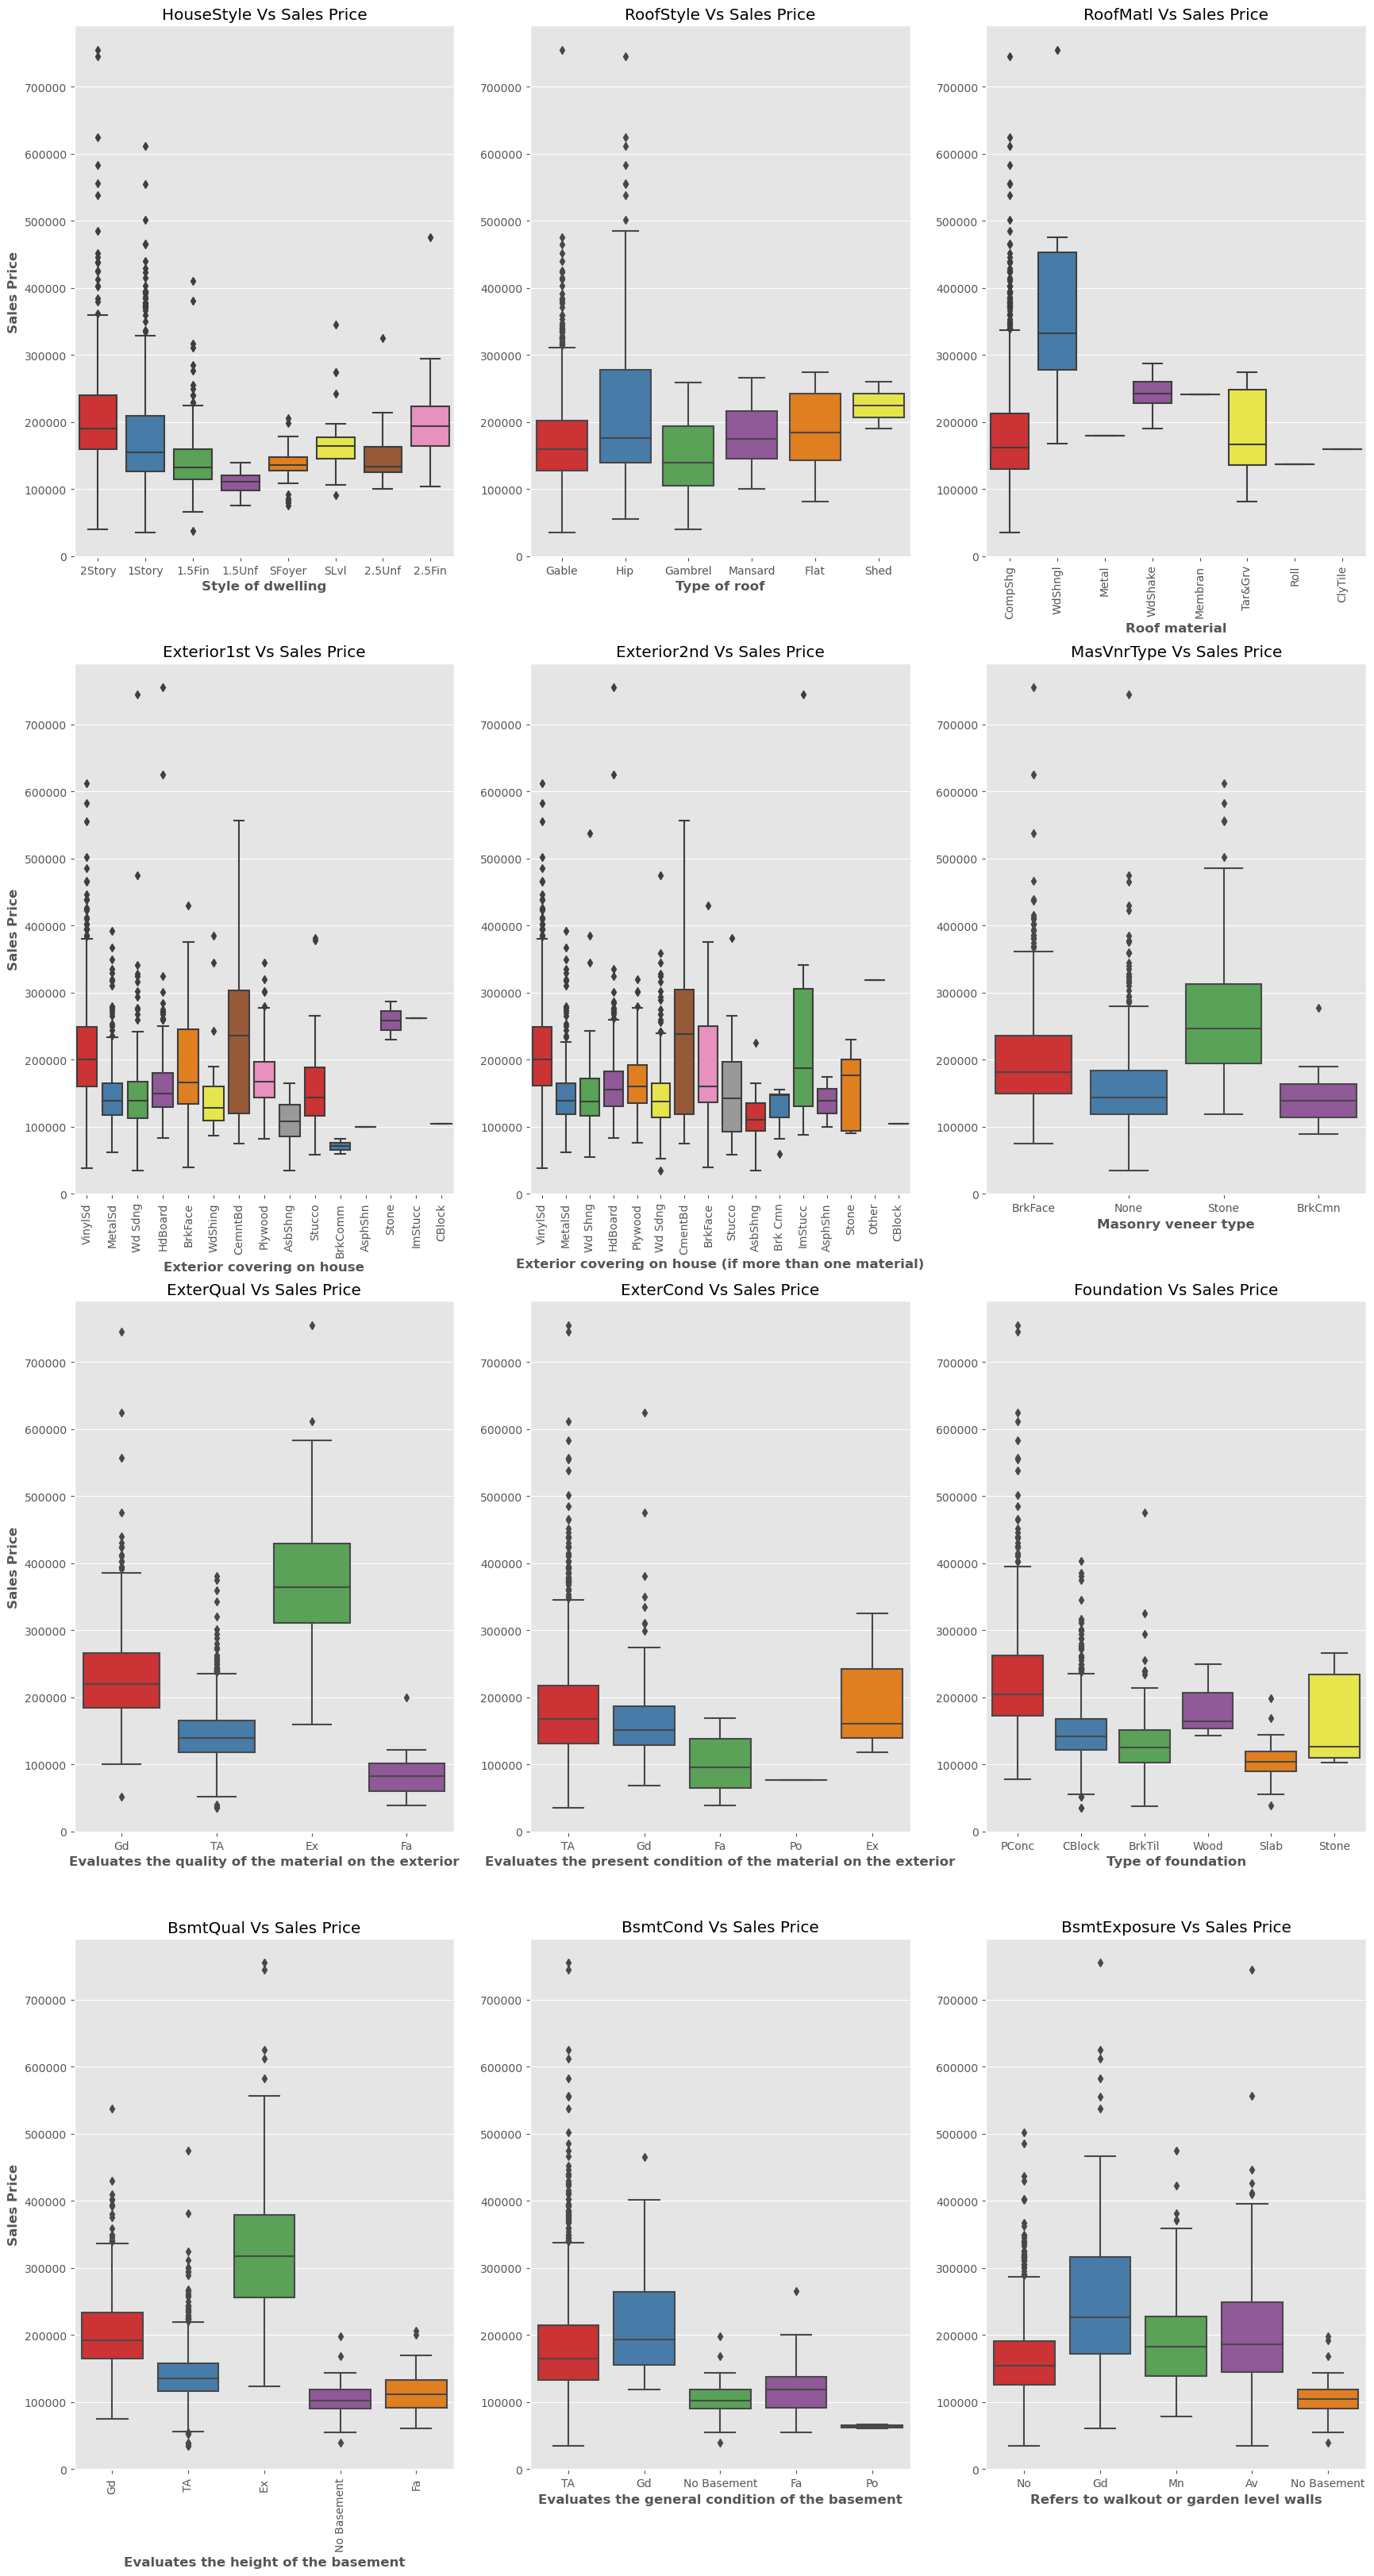

In [21]:
fig = plt.figure(figsize = (21,40))

plt.subplot(431)
sns.boxplot(x='HouseStyle',y='SalePrice',data=df, palette="Set1")
plt.title('HouseStyle Vs Sales Price')
plt.xlabel('Style of dwelling', fontsize=12,fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(432)
sns.boxplot(x='RoofStyle',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('RoofStyle Vs Sales Price')
plt.xlabel('Type of roof', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(433)
sns.boxplot(x='RoofMatl',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('RoofMatl Vs Sales Price')
plt.xlabel('Roof material', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)
plt.xticks(rotation=90)


plt.subplot(434)
sns.boxplot(x='Exterior1st',y='SalePrice',data=df, palette="Set1")
plt.title('Exterior1st Vs Sales Price')
plt.xlabel('Exterior covering on house', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)


plt.subplot(435)
sns.boxplot(x='Exterior2nd',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Exterior2nd Vs Sales Price')
plt.xlabel('Exterior covering on house (if more than one material)', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)
plt.xticks(rotation=90)


plt.subplot(436)
sns.boxplot(x='MasVnrType',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('MasVnrType Vs Sales Price')
plt.xlabel('Masonry veneer type', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)

plt.subplot(437)
sns.boxplot(x='ExterQual',y='SalePrice',data=df, palette="Set1")
plt.title('ExterQual Vs Sales Price')
plt.xlabel('Evaluates the quality of the material on the exterior', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(438)
sns.boxplot(x='ExterCond',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('ExterCond Vs Sales Price')
plt.xlabel('Evaluates the present condition of the material on the exterior', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(439)
sns.boxplot(x='Foundation',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Foundation Vs Sales Price')
plt.xlabel('Type of foundation', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(4,3,10)
sns.boxplot(x='BsmtQual',y='SalePrice',data=df, palette="Set1")
plt.title('BsmtQual Vs Sales Price')
plt.xlabel('Evaluates the height of the basement', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')
plt.xticks(rotation=90)

plt.subplot(4,3,11)
sns.boxplot(x='BsmtCond',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('BsmtCond Vs Sales Price')
plt.xlabel('Evaluates the general condition of the basement', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(4,3,12)
sns.boxplot(x='BsmtExposure',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('BsmtExposure Vs Sales Price')
plt.xlabel('Refers to walkout or garden level walls', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)
plt.show()

##### Style of Dwelling:

**Houses have two and one-half stories:** 2nd level finished have the highest sales price followed by Two stories, Split Level ~ Split Foyer, One story, One and one-half story: 2nd level unfinished~Two and one-half story: 2nd level finished.

**Type of roof:** Houses having shed has higher sales price followed by Hip ~ Mansard ~Flat and Gable and Gabrel (Barn).

**Roof material:** Houses sales price observed in the order of subcategory having Wood Shingles > Wood Shakes ~ Membrane> metal> Gravel & Tar ~ Clay or Tile>Roll~ Standard (Composite) Shingle. Moreover, pretty few outliers are observed in those houses having Standard (Composite) Shingle sales prices.

**Exterior1st:** Exterior covering on the house: - House sales price observed in the order of subcategory having Stone> Imitation Stucco> Cement Board> Vinyl Siding> Brick Face~ Plywood> Stucco~ Hard Board> Metal Siding~ Wood Siding> Asbestos Shingles~ Asphalt Shingles~ Cinder Block. An almost similar pattern was observed in Exterior2nd; Exterior covering on the house (if more than one material).

**Masonry veneer type:** House price observed in the order of subcategory having stone> Brick Face>None> Cinder Block.

**Evaluate the material quality on the exterior:** House sale price observed in the order of subcategory having Excellent> Good>Average/Typical>Fair. A similar pattern was also observed in house price having subcategory of valuates the present condition of the material on the exterior.

**Type of foundation:** House sale price observed in order of subcategory having Stone> Brick & Tile >none> Poured Concrete >Wood> Cinder Block> Brick & Tile> Slab.

**Evaluate the general condition of the basement:** House sale price observed in the order of subcategory having Excellent> Good>Average/Typical>Fair. A similar pattern was also observed in house price having subcategory of refers to walkout or garden level walls and Refers to walkout or garden level walls.

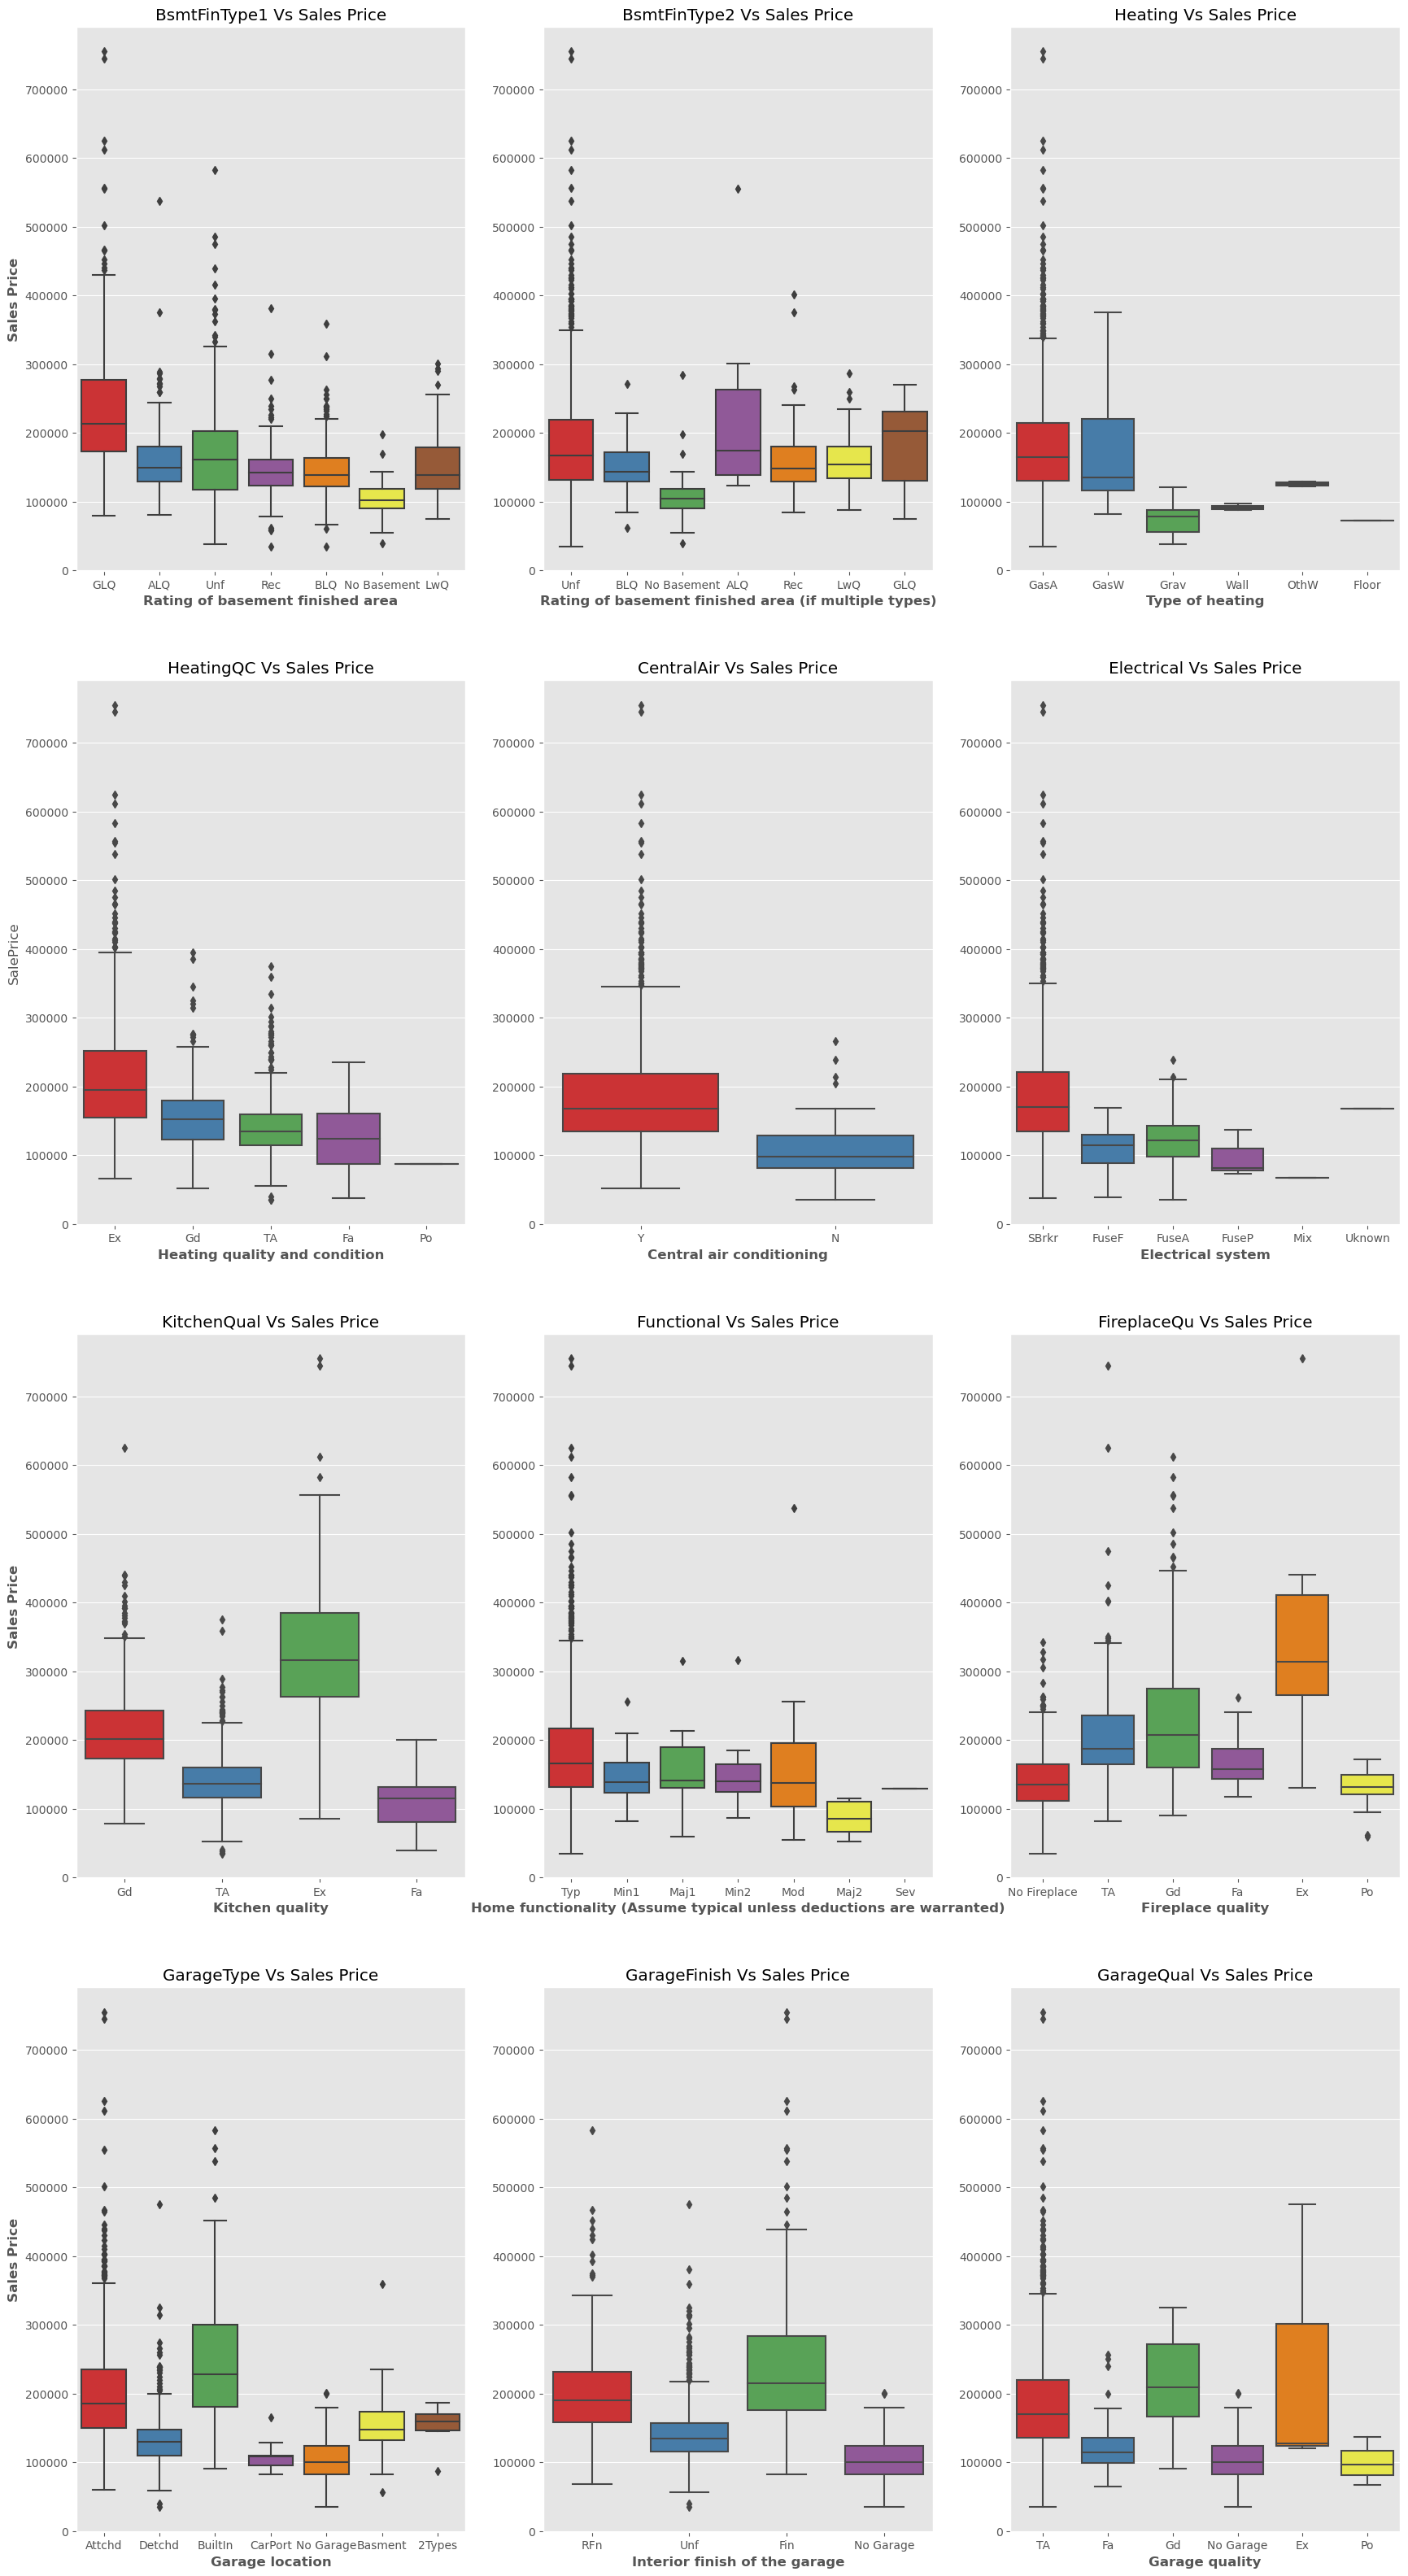

In [22]:
fig = plt.figure(figsize = (21,40))

plt.subplot(431)
sns.boxplot(x='BsmtFinType1',y='SalePrice',data=df, palette="Set1")
plt.title('BsmtFinType1 Vs Sales Price')
plt.xlabel('Rating of basement finished area', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(432)
sns.boxplot(x='BsmtFinType2',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('BsmtFinType2 Vs Sales Price')
plt.xlabel('Rating of basement finished area (if multiple types)', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(433)
sns.boxplot(x='Heating',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Heating Vs Sales Price')
plt.xlabel('Type of heating', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(434)
sns.boxplot(x='HeatingQC',y='SalePrice',data=df, palette="Set1")
plt.title('HeatingQC Vs Sales Price')
plt.xlabel('Heating quality and condition', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(435)
sns.boxplot(x='CentralAir',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('CentralAir Vs Sales Price')
plt.xlabel('Central air conditioning', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(436)
sns.boxplot(x='Electrical',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Electrical Vs Sales Price')
plt.xlabel('Electrical system', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)

plt.subplot(437)
sns.boxplot(x='KitchenQual',y='SalePrice',data=df, palette="Set1")
plt.title('KitchenQual Vs Sales Price')
plt.xlabel('Kitchen quality', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(438)
sns.boxplot(x='Functional',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('Functional Vs Sales Price')
plt.xlabel('Home functionality (Assume typical unless deductions are warranted)', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(439)
sns.boxplot(x='FireplaceQu',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('FireplaceQu Vs Sales Price')
plt.xlabel('Fireplace quality', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)

plt.subplot(4,3,10)
sns.boxplot(x='GarageType',y='SalePrice',data=df, palette="Set1")
plt.title('GarageType Vs Sales Price')
plt.xlabel('Garage location', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12, fontweight='bold')


plt.subplot(4,3,11)
sns.boxplot(x='GarageFinish',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('GarageFinish Vs Sales Price')
plt.xlabel('Interior finish of the garage', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(4,3,12)
sns.boxplot(x='GarageQual',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('GarageQual Vs Sales Price')
plt.xlabel('Garage quality', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)
plt.show()

**Rating of basement finished area:** House sale price observed in the order of subcategory having Good Living Quarters> Unfinshed> Low-Quality ~ Average Rec Room~ Average Living Quarters~ Below Average Living Quarters> No Basement.

**Rating of basement finished area (if multiple types):** House sale price observed in the order of subcategory having Good Living Quarters> Unfinshed> Below Average Living Quarters> Low-Quality ~ Average Rec Room~ Average Living Quarters> No Basement.

**Type of heating:** House sale price observed in the order of subcategory having Gas forced warm air furnace> Gas hot water or steam heat ~ Hot water or steam heat other than Gas> Wall furnace> Gravity furnace ~ Floor Furnace.

**Heating quality and condition:** House sale price observed in the order of subcategory having Excellent>Good> Average/Typical>Fair>Poor. A similar pattern was also observed in the subcategory of the house having Kitchen quality.

**Central air conditioning:** House sale price observed in the order of subcategory having Yes > No.

**Electrical system:** House sale price observed in the order of subcategory having Standard Circuit Breakers & Romex>unknown>60 AMP Fuse Box and mostly Romex wiring (Fair)~ Fuse Box over 60 AMP and all Romex wiring (Average)> 60 AMP Fuse Box and mostly knob & tube wiring (poor)>Mixed.

**Home functionality (Assume typical unless deductions are warranted):** House sale price observed in the order of subcategory having Typical Functionality> Minor Deductions 1~ Major Deductions 1~ Minor Deductions 2 ~ Moderate Deductions ~ Severely Damaged > Major Deductions 2.

**Fireplace quality:** House sale price observed in the order of subcategory having Exceptional Masonry Fireplace> Good - Masonry Fireplace in the main level> Average - Prefabricated Fireplace in the main living area or Masonry Fireplace in basement> Fair - Prefabricated Fireplace in basement> Poor - Ben Franklin Stove.

**Garage location:** House sale price observed in the order of subcategory having Built-in (Garage part of the house - typically has room above the garage)> Attached to home> More than one type of garage> Detached from home> Car Port> No Garage.

**Interior finish of the garage:** House sale price observed in the order of subcategory having Finished> Rough Finished > Unfinished> No Garage.

**Garage quality:** House sale price observed in the order of subcategory having Excellent>Good>Typical/Average>Fair>Poor>No Garage.

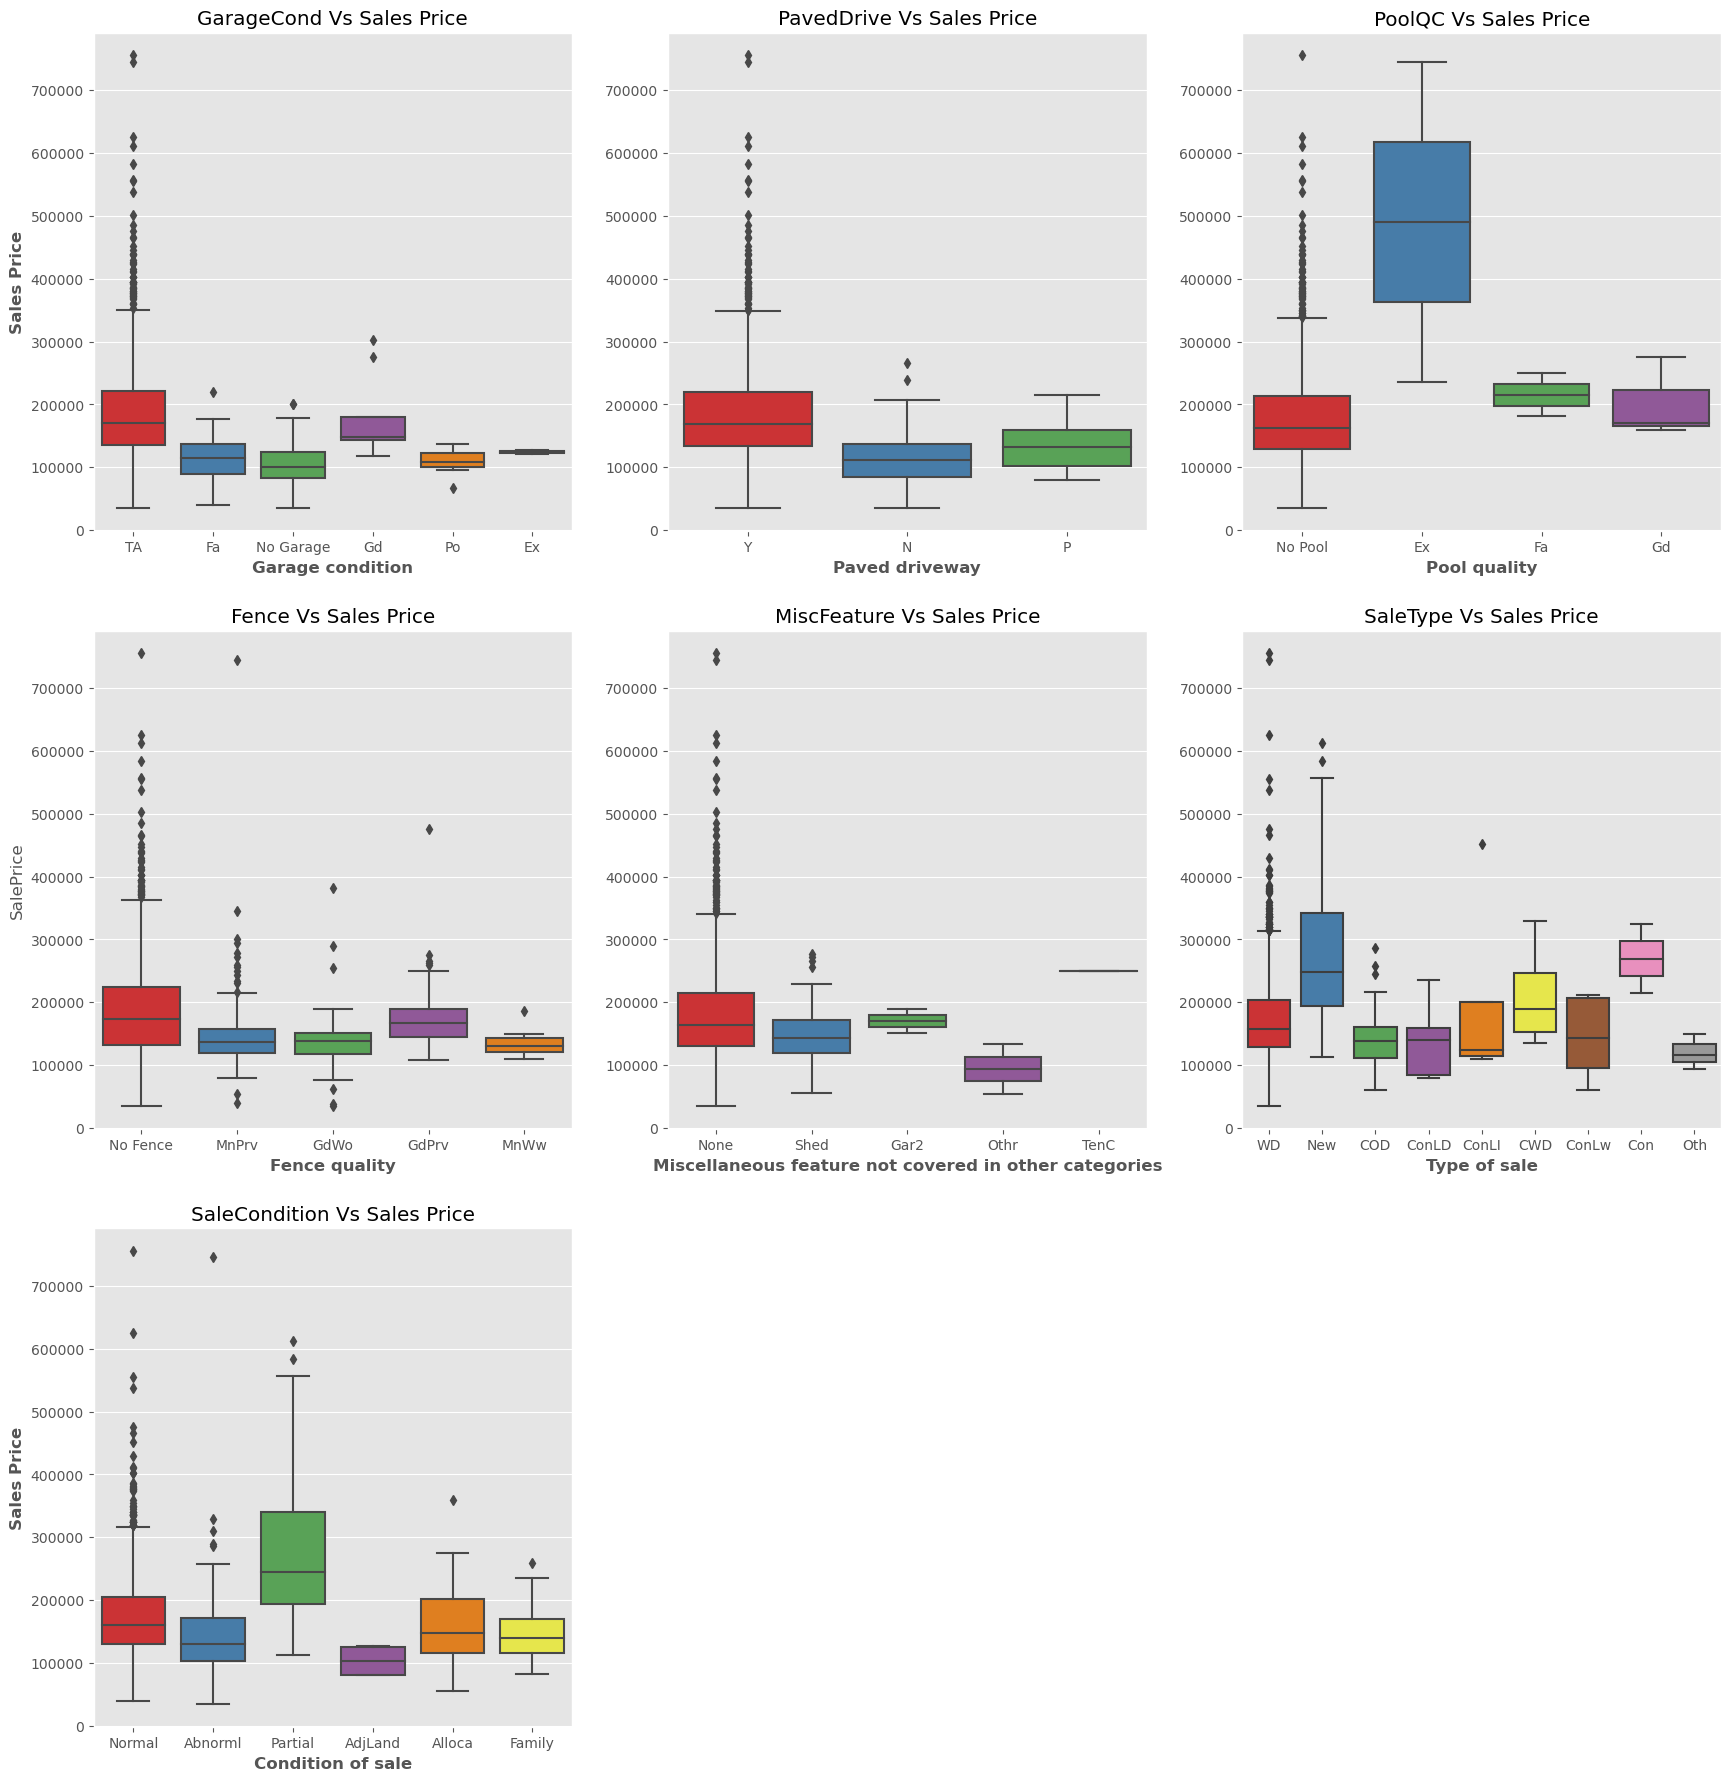

In [23]:
fig = plt.figure(figsize = (21,22))

plt.subplot(331)
sns.boxplot(x='GarageCond',y='SalePrice',data=df, palette="Set1")
plt.title('GarageCond Vs Sales Price')
plt.xlabel('Garage condition', fontsize=12,fontweight='bold')
plt.ylabel('Sales Price', fontsize=12,fontweight='bold')


plt.subplot(332)
sns.boxplot(x='PavedDrive',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('PavedDrive Vs Sales Price')
plt.xlabel('Paved driveway', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(333)
sns.boxplot(x='PoolQC',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('PoolQC Vs Sales Price')
plt.xlabel('Pool quality', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(334)
sns.boxplot(x='Fence',y='SalePrice',data=df, palette="Set1")
plt.title('Fence Vs Sales Price')
plt.xlabel('Fence quality', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(335)
sns.boxplot(x='MiscFeature',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('MiscFeature Vs Sales Price')
plt.xlabel('Miscellaneous feature not covered in other categories', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(336)
sns.boxplot(x='SaleType',y='SalePrice',data=df, palette="Set1").set(ylabel=None)
plt.title('SaleType Vs Sales Price')
plt.xlabel('Type of sale', fontsize=12, fontweight='bold')
# plt.ylabel('Sales Price', fontsize=12)


plt.subplot(337)
sns.boxplot(x='SaleCondition',y='SalePrice',data=df, palette="Set1")
plt.title('SaleCondition Vs Sales Price')
plt.xlabel('Condition of sale', fontsize=12, fontweight='bold')
plt.ylabel('Sales Price', fontsize=12,fontweight='bold')
plt.show()

**Garage Condition:** House sale price observed in the order of subcategory having Excellent>Good>Typical/Average>Fair>Poor>No Garage.

**Paved driveway:** House sale price observed in the order of subcategory having Paved >Partial>Dirt/Gravel.

**Pool quality:** House sale price observed in the order of subcategory having Excellent >Fair>Good>No Pool.

**Fence quality:** House sale price observed in the order of subcategory having Good Privacy~ No Fence> Minimum Privacy> Minimum Privacy~ Good Wood~ Minimum Wood/Wire.

**Type of sale:** House sale price observed in the order of subcategory having Home just constructed and sold> Contract 15% Down regular payment terms> Warranty Deed – Cash> Court Officer Deed/Estate~ Contract Low Interest~ Contract Low Interest>Other.

**Condition of sale:** House sale price observed in the order of subcategory having Home was not completed when last assessed (associated with New Homes)> Normal Sale ~ Allocation - two linked properties with separate deeds, typically condo with a garage unit> Sale between family members~ Abnormal Sale - trade, foreclosure, short sale> Adjoining Land Purchase.

In [24]:
# Droping following categorical variables that are not impacting much in sales price
print(datastyle.start+"Dropped Categorical Varibeles:"+ datastyle.end,"'Alley','BsmtCond','BsmtFinType1','BsmtFinType2','GarageQual','PoolQC','MiscFeature'"); Line_Separator1()
df=df.drop(['Alley','BsmtCond','BsmtFinType1','BsmtFinType2','GarageQual','PoolQC','MiscFeature'],axis=1)

Dropped Categorical Varibeles: 'Alley','BsmtCond','BsmtFinType1','BsmtFinType2','GarageQual','PoolQC','MiscFeature'
**************************************************************************************************** 



In [25]:
bins=[1872,1950,1976,1991,2001,2010]
bins_names=['1872-1950','1950-1975','1976-1990','1991-2000','2001-2010']
df['YearRemodAdd']=pd.cut(df['YearRemodAdd'],bins,labels=bins_names,include_lowest=True)
100*(df['YearRemodAdd'].value_counts()/df['YearRemodAdd'].count())

2001-2010    32.602740
1950-1975    24.041096
1991-2000    20.000000
1872-1950    12.191781
1976-1990    11.164384
Name: YearRemodAdd, dtype: float64

In [26]:
bins=[1872,1925,1950,1976,1991,2001,2010]
bins_names=['1872-1925','1925-1950','1950-1975','1976-1990','1991-2000','2001-2010']
df['YearBuilt']=pd.cut(df['YearBuilt'],bins,labels=bins_names,include_lowest=True)
print(100*(df['YearBuilt'].value_counts()/df['YearBuilt'].count()))

1950-1975    31.027397
2001-2010    23.561644
1991-2000    13.013699
1925-1950    12.054795
1872-1925    11.095890
1976-1990     9.246575
Name: YearBuilt, dtype: float64


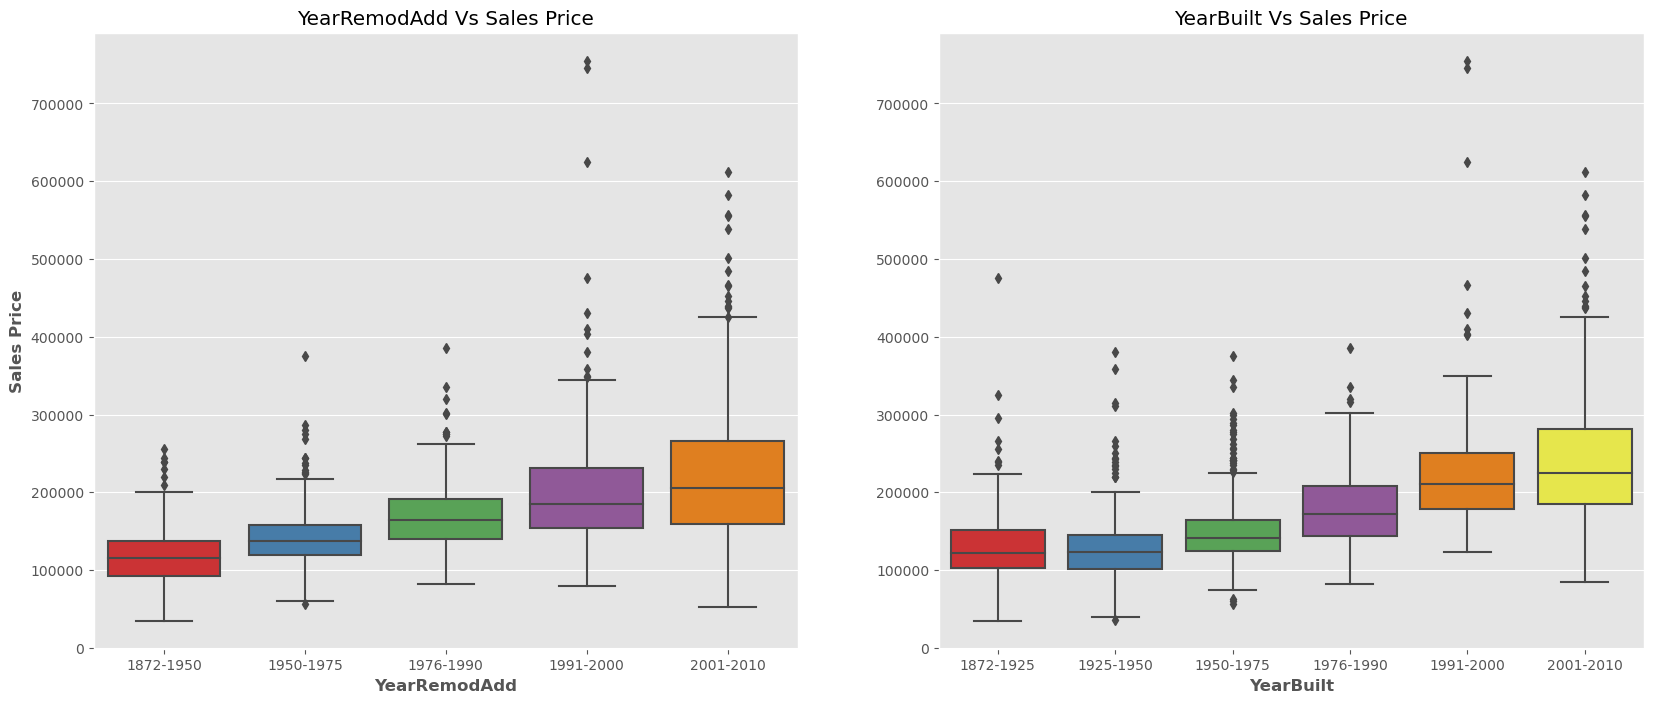

In [27]:
plt.figure(figsize=(20,8))

plt.subplot(121)
sns.boxplot(x = 'YearRemodAdd', y = 'SalePrice', data = df, palette="Set1")
plt.title('YearRemodAdd Vs Sales Price')
plt.xlabel('YearRemodAdd', fontsize=12,fontweight='bold')
plt.ylabel('Sales Price', fontsize=12,fontweight='bold')


plt.subplot(122)
sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = df, palette="Set1").set(ylabel=None)
plt.title('YearBuilt Vs Sales Price')
plt.xlabel('YearBuilt', fontsize=12, fontweight='bold')
#plt.ylabel('Sales Price', fontsize=12)
plt.show()

The newer the house is built to get a better price.

In [28]:
# Convert int to object for categorical variables as the importance of its shows on sale price
print(datastyle.start+"Converted YearRemodAdd, and YearBuilt from integer to categorical variables"+ datastyle.end)
df['YearRemodAdd'] = df['YearRemodAdd'].astype('object')
df['YearBuilt'] = df['YearBuilt'].astype('object')

Converted YearRemodAdd, and YearBuilt from integer to categorical variables


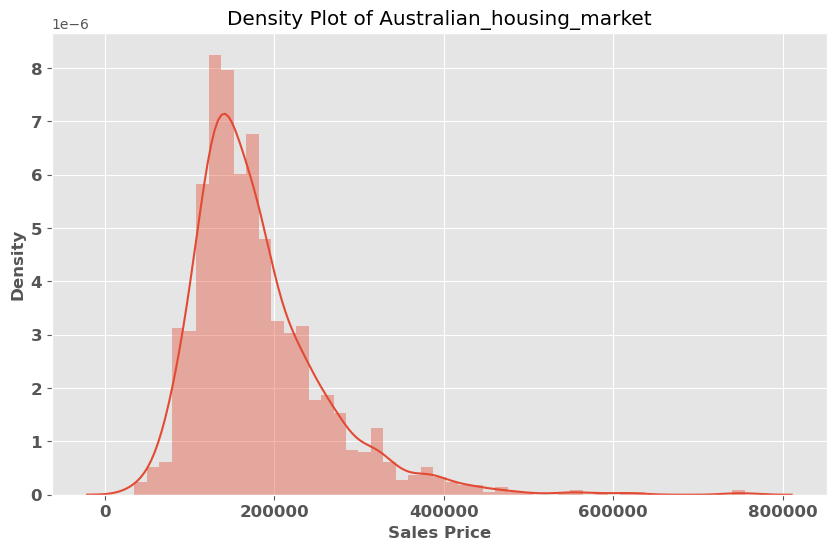

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(df.SalePrice)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.title("Density Plot of Australian_housing_market")
plt.xlabel('Sales Price', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.show()

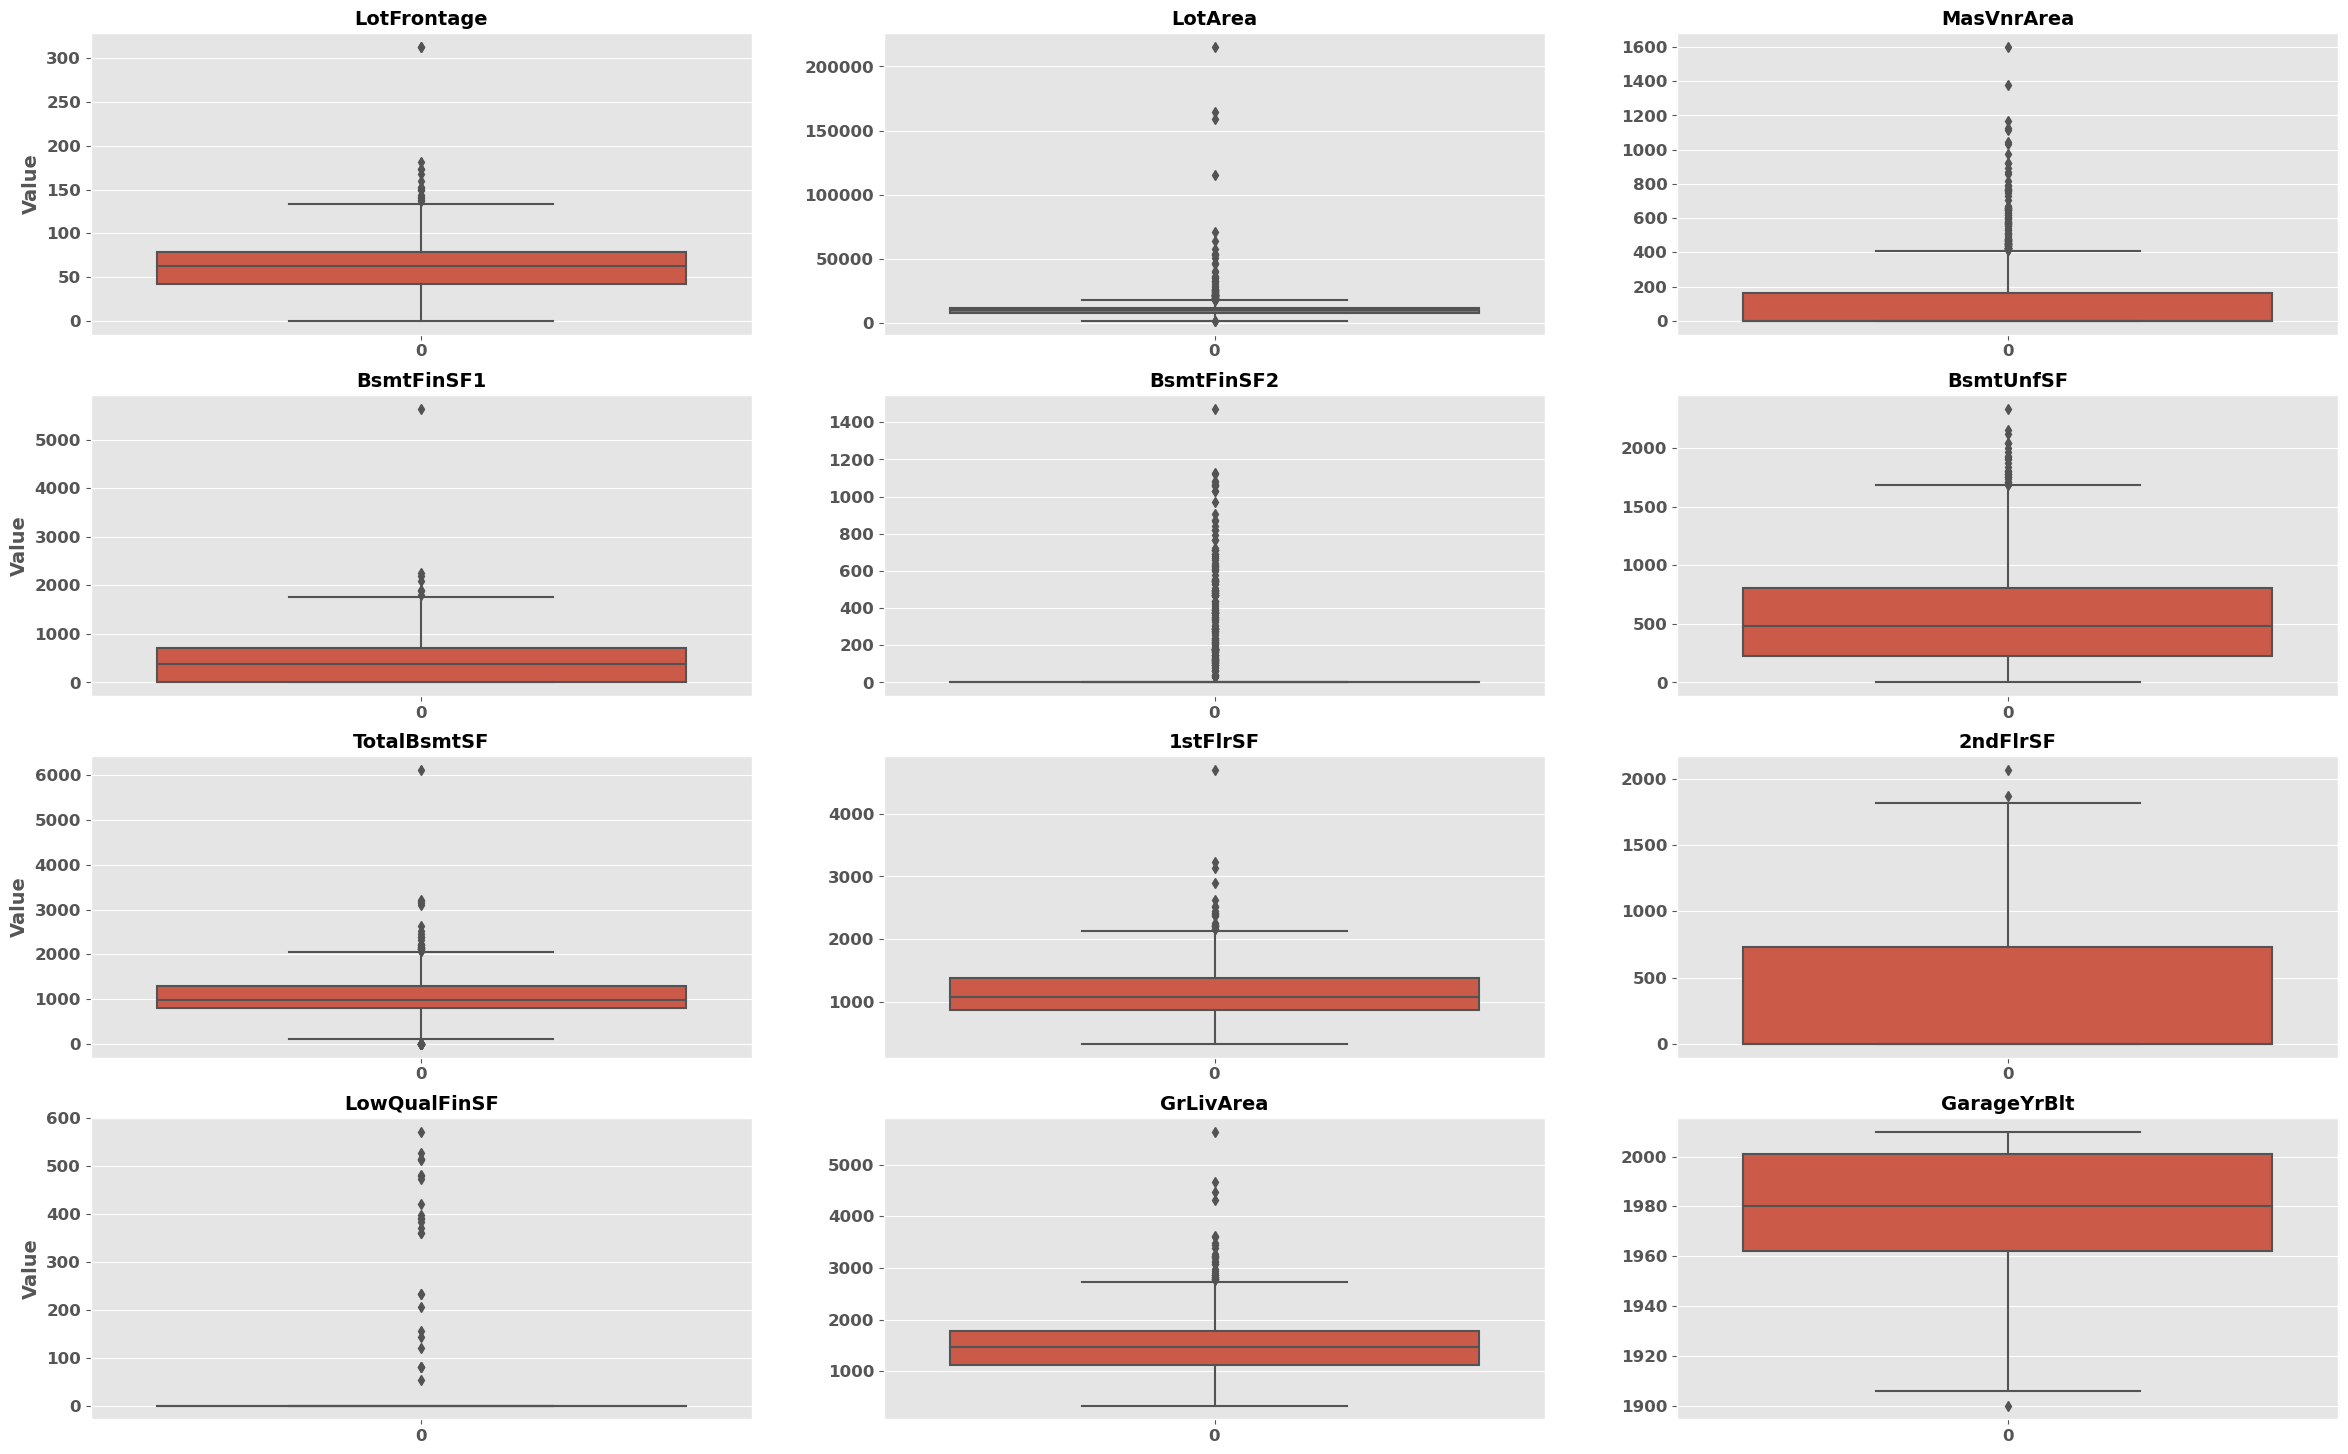

In [31]:
# Identify the outliers

# Outliers detection in  numerical variables

# Plot box-plot to check the data outliers
fig = plt.figure(figsize = (29,18))


plt.subplot(431)
sns.boxplot(data=df['LotFrontage'])
plt.title('LotFrontage', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')


plt.subplot(432)
sns.boxplot(data=df['LotArea']).set(ylabel=None)
plt.title('LotArea', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=14)


plt.subplot(433)
sns.boxplot(data=df['MasVnrArea']).set(ylabel=None)
plt.title('MasVnrArea', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=14)

plt.subplot(434)
sns.boxplot(data=df['BsmtFinSF1'])
plt.title('BsmtFinSF1', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(435)

sns.boxplot(data=df['BsmtFinSF2']).set(ylabel=None)
plt.title('BsmtFinSF2', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=14)

plt.subplot(436)
sns.boxplot(data=df['BsmtUnfSF']).set(ylabel=None)
plt.title('BsmtUnfSF', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=14)

plt.subplot(437)
sns.boxplot(data=df['TotalBsmtSF'])
plt.title('TotalBsmtSF', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(4,3,8)
sns.boxplot(data=df['1stFlrSF']).set(ylabel=None)
plt.title('1stFlrSF', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=14, fontweight='bold')

plt.subplot(4,3,9)
sns.boxplot(data=df['2ndFlrSF']).set(ylabel=None)
plt.title('2ndFlrSF', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=14)

plt.subplot(4,3,10)
sns.boxplot(data=df['LowQualFinSF'])
plt.title('LowQualFinSF', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(4,3,11)
sns.boxplot(data=df['GrLivArea']).set(ylabel=None)
plt.title('GrLivArea', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=10)

plt.subplot(4,3,12)
sns.boxplot(data=df['GarageYrBlt']).set(ylabel=None)
plt.title('GarageYrBlt', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=10)

plt.show()

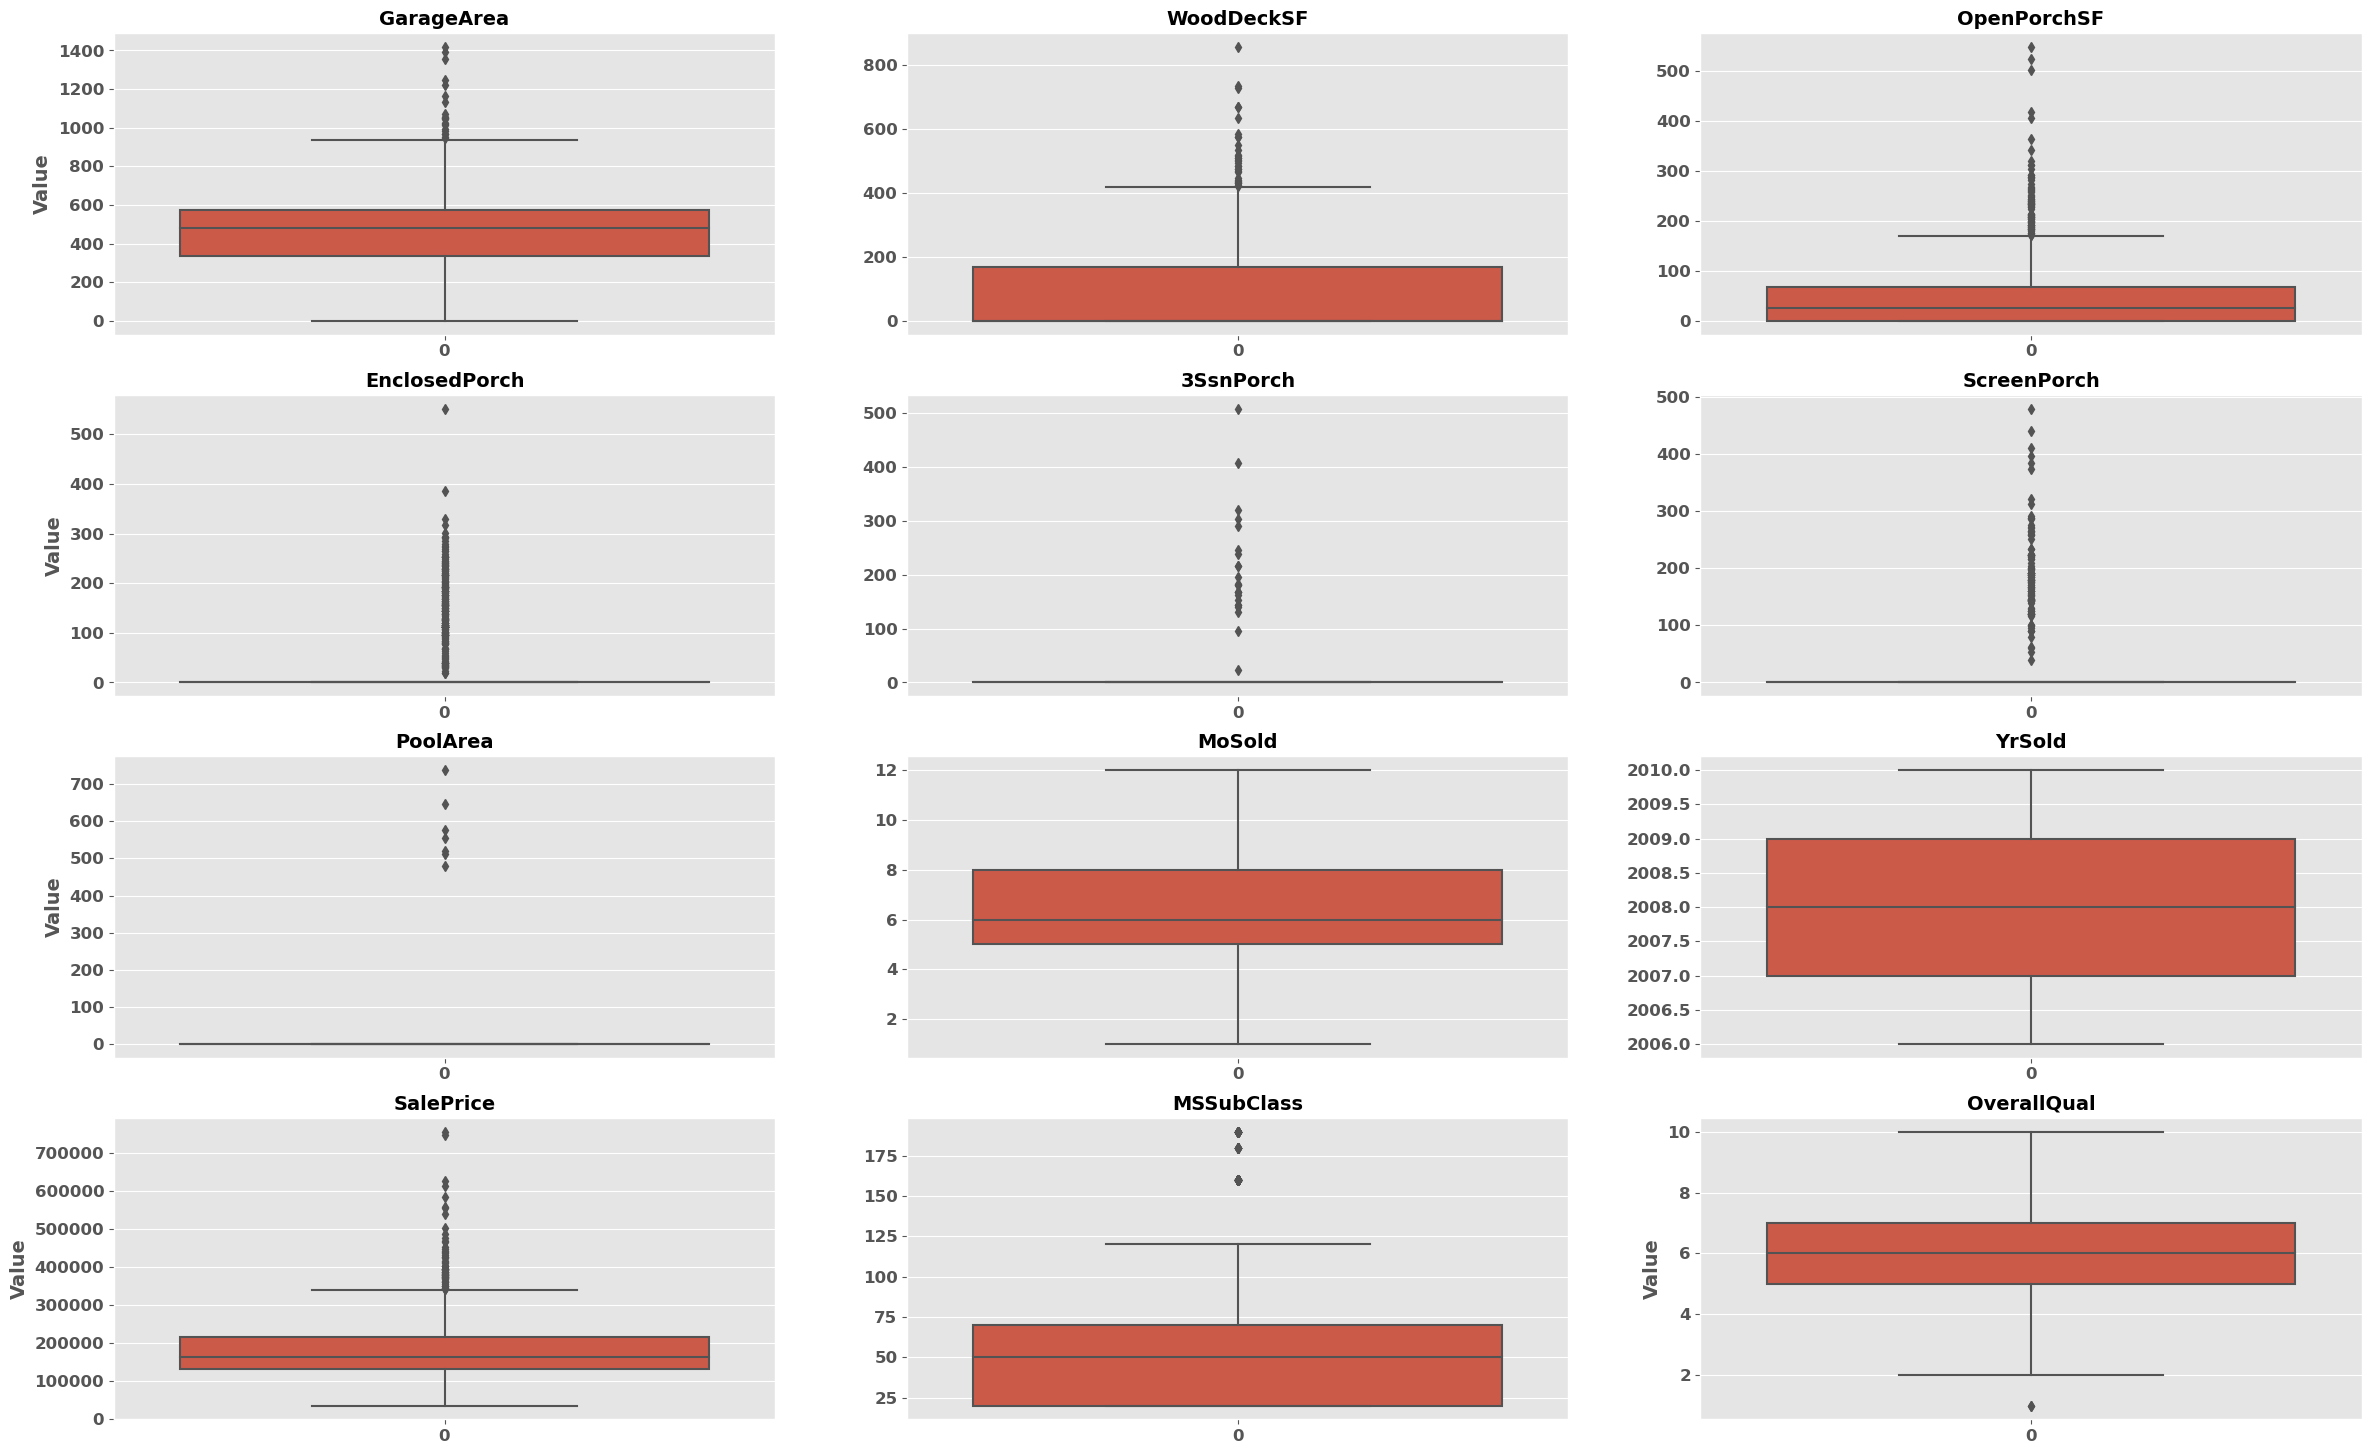

In [32]:
fig = plt.figure(figsize = (29,18))


plt.subplot(431)
sns.boxplot(data=df['GarageArea'])
plt.title('GarageArea', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(432)
sns.boxplot(data=df['WoodDeckSF']).set(ylabel=None)
plt.title('WoodDeckSF', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=10)

plt.subplot(433)
sns.boxplot(data=df['OpenPorchSF']).set(ylabel=None)
plt.title('OpenPorchSF', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=10)

plt.subplot(434)
sns.boxplot(data=df['EnclosedPorch'])
plt.title('EnclosedPorch', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(435)
sns.boxplot(data=df['3SsnPorch']).set(ylabel=None)
plt.title('3SsnPorch', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=10)

plt.subplot(436)
sns.boxplot(data=df['ScreenPorch']).set(ylabel=None)
plt.title('ScreenPorch', fontsize=14,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=10)

plt.subplot(437)
sns.boxplot(data=df['PoolArea'])
plt.title('PoolArea', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(4,3,8)
sns.boxplot(data=df['MoSold']).set(ylabel=None)
plt.title('MoSold', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
#plt.ylabel('value', fontsize=10)

plt.subplot(4,3,9)
sns.boxplot(data=df['YrSold']).set(ylabel=None)
plt.title('YrSold', fontsize=14,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
#plt.ylabel('value', fontsize=10)

plt.subplot(4,3,10)
sns.boxplot(data=df['SalePrice'])
plt.title('SalePrice', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(4,3,11)
sns.boxplot(data=df['MSSubClass']).set(ylabel=None)
plt.title('MSSubClass', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
# plt.ylabel('value', fontsize=10)

plt.subplot(4,3,12)
sns.boxplot(data=df['OverallQual']).set(ylabel=None)
plt.title('OverallQual', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.show()

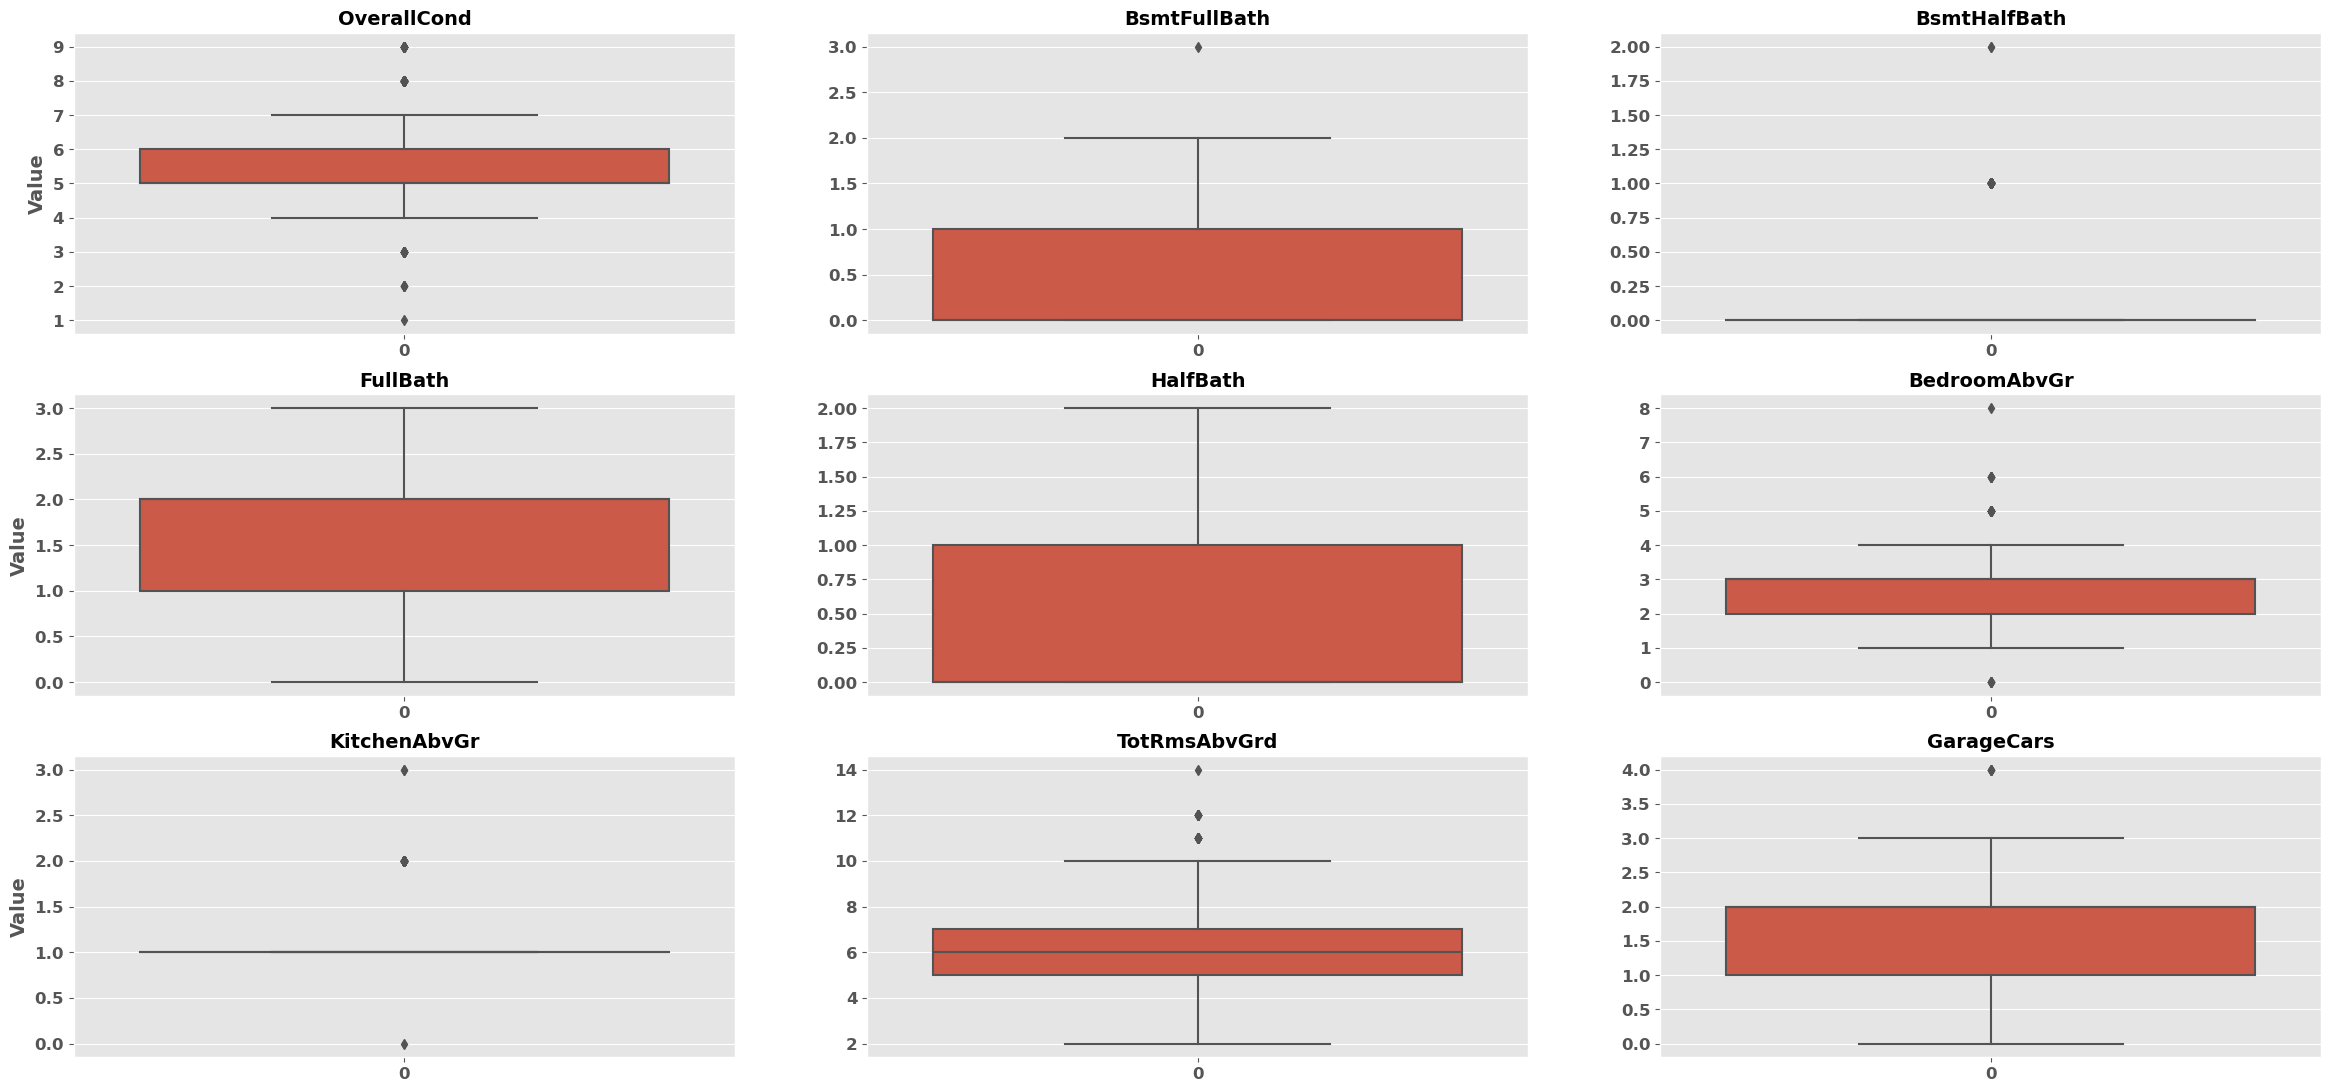

In [33]:
fig = plt.figure(figsize = (29,18))


plt.subplot(431)
sns.boxplot(data=df['OverallCond'])
plt.title('OverallCond', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(432)
sns.boxplot(data=df['BsmtFullBath']).set(ylabel=None)
plt.title('BsmtFullBath', fontsize=14,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
#plt.ylabel('Value', fontsize=14, fontweight='bold')

plt.subplot(433)
sns.boxplot(data=df['BsmtHalfBath']).set(ylabel=None)
plt.title('BsmtHalfBath', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
#plt.ylabel('Value', fontsize=14, fontweight='bold')

plt.subplot(434)
sns.boxplot(data=df['FullBath'])
plt.title('FullBath', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(435)
sns.boxplot(data=df['HalfBath']).set(ylabel=None)
plt.title('HalfBath', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
#plt.ylabel('Value', fontsize=14, fontweight='bold')

plt.subplot(436)
sns.boxplot(data=df['BedroomAbvGr']).set(ylabel=None)
plt.title('BedroomAbvGr', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
#plt.ylabel('Value', fontsize=14, fontweight='bold')

plt.subplot(437)
sns.boxplot(data=df['KitchenAbvGr'])
plt.title('KitchenAbvGr', fontsize=14, fontweight='bold')
plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(4,3,8)
sns.boxplot(data=df['TotRmsAbvGrd']).set(ylabel=None)
plt.title('TotRmsAbvGrd', fontsize=14, fontweight='bold')
#plt.ylabel('Value', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')

plt.subplot(4,3,9)
sns.boxplot(data=df['GarageCars']).set(ylabel=None)
plt.title('GarageCars', fontsize=14, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
#plt.ylabel('Value', fontsize=14, fontweight='bold')

plt.show()

From the box-plot graph, we observe the outliers we will not treat at present and will take a call based on analysis in the following steps.

In [34]:
print(datastyle.start+"Dropped ID column"+ datastyle.end)
df=df.drop(['Id'],axis=1)

Dropped ID column


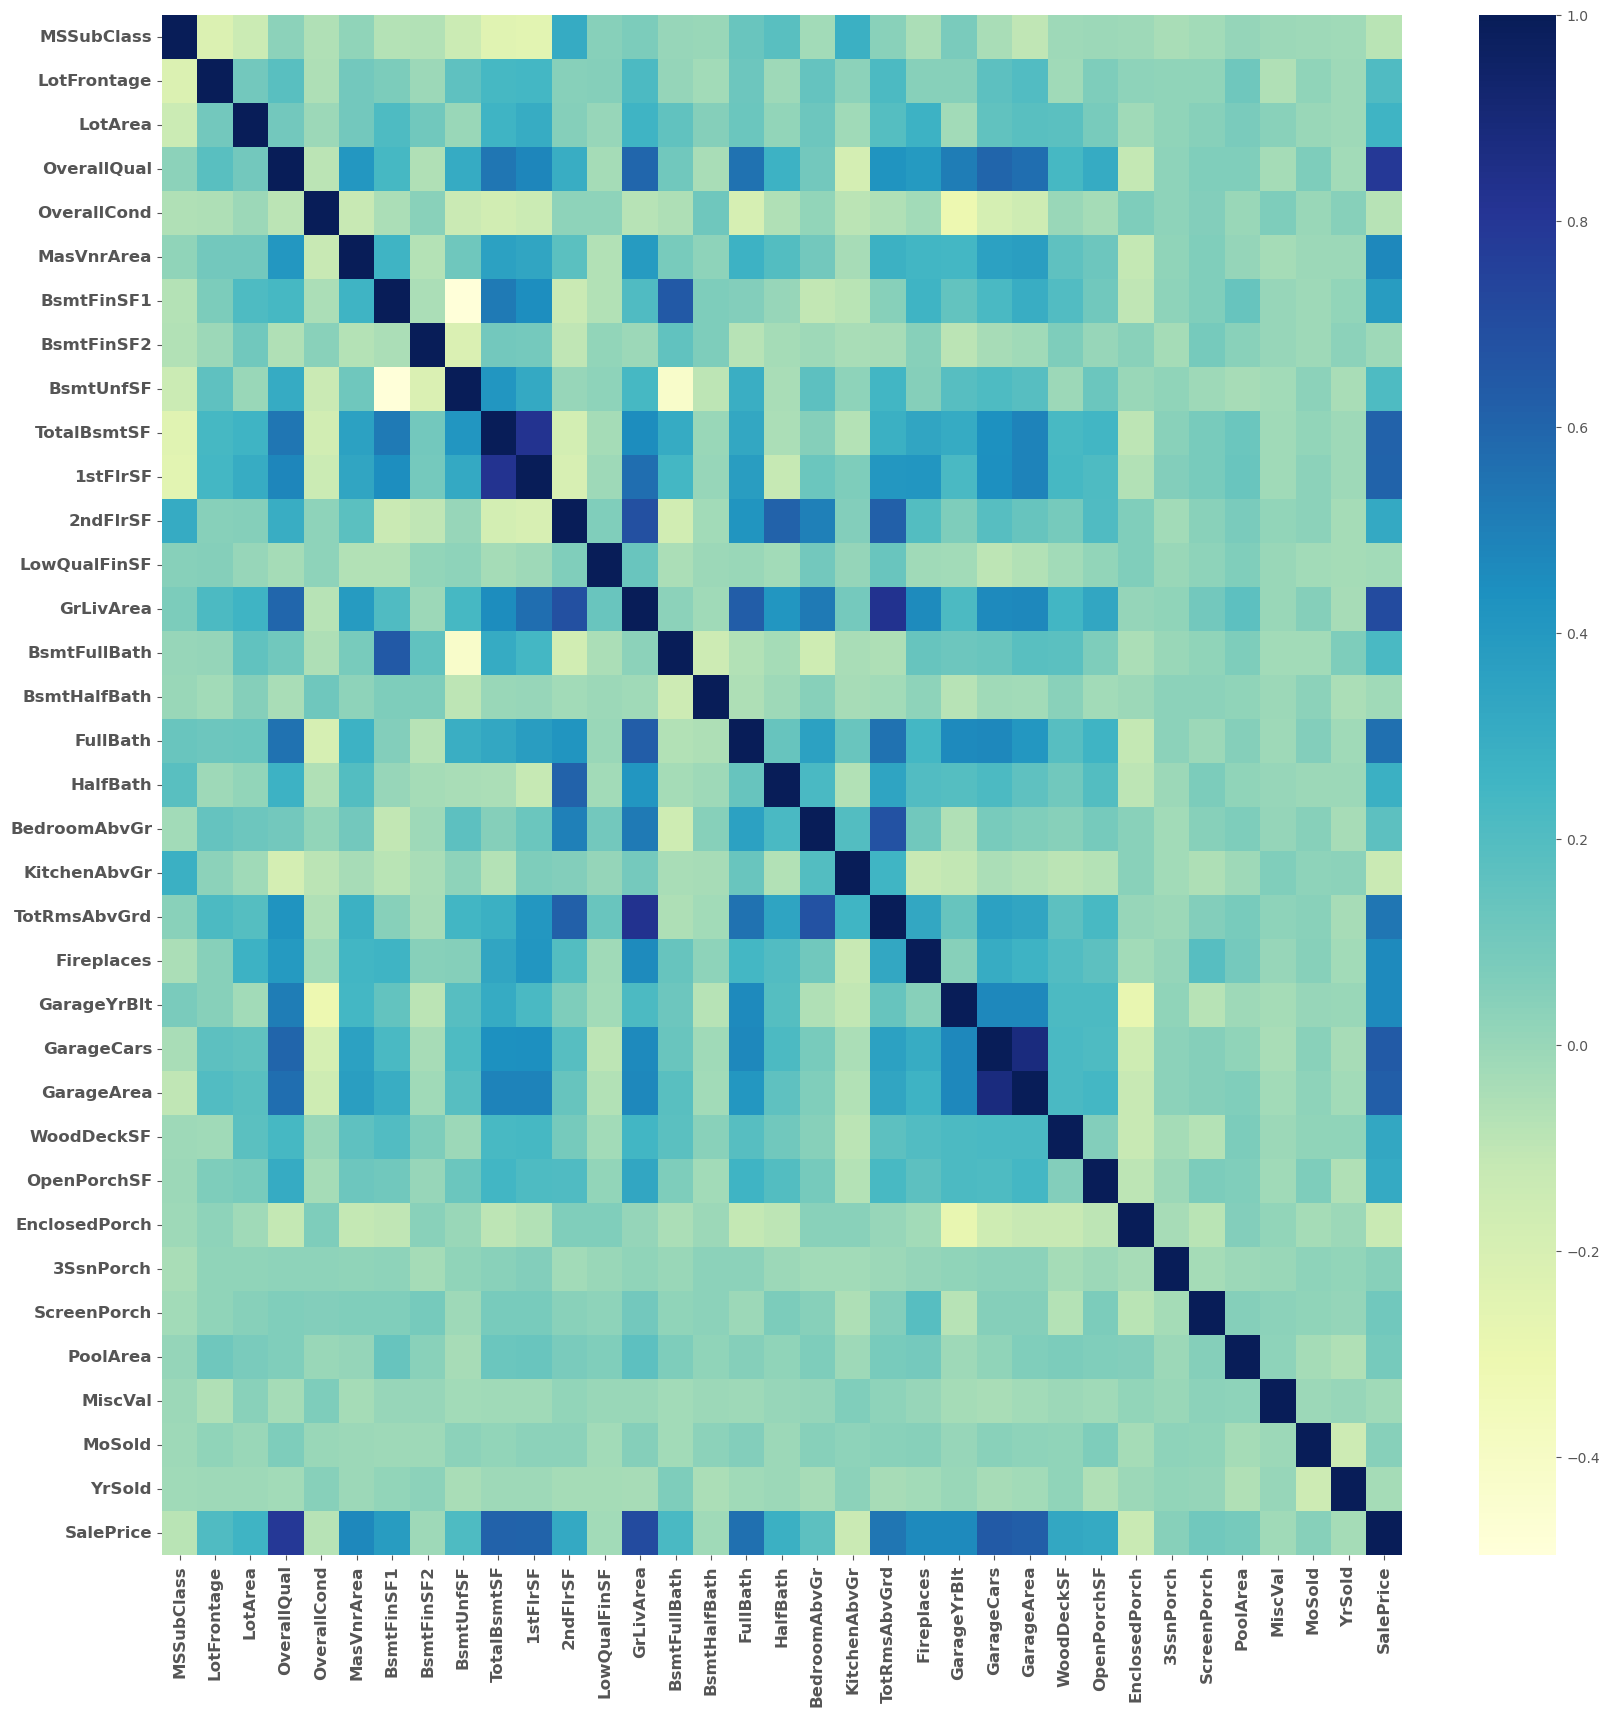

**************************************************************************************************** 

Features having correlation 0.50 above:12

['TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [36]:
# Plot heatmap to check the multicollinearity in the variables
plt.figure(figsize = (20,20))  
g= df.corr()
sns.heatmap(g,cmap="YlGnBu",annot = False)
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show();Line_Separator1()

# Upper value
Upper_Value = g.where(np.triu(np.ones(g.shape), k=1).astype(bool))

# Features having a Higher correlation of more than 0.5
High_Corr_features = [column for column in Upper_Value.columns if any(Upper_Value[column] > 0.50)]

print("Features having correlation 0.50 above:{}\n\n{}".format(len(High_Corr_features), High_Corr_features))

<Figure size 1800x1000 with 0 Axes>

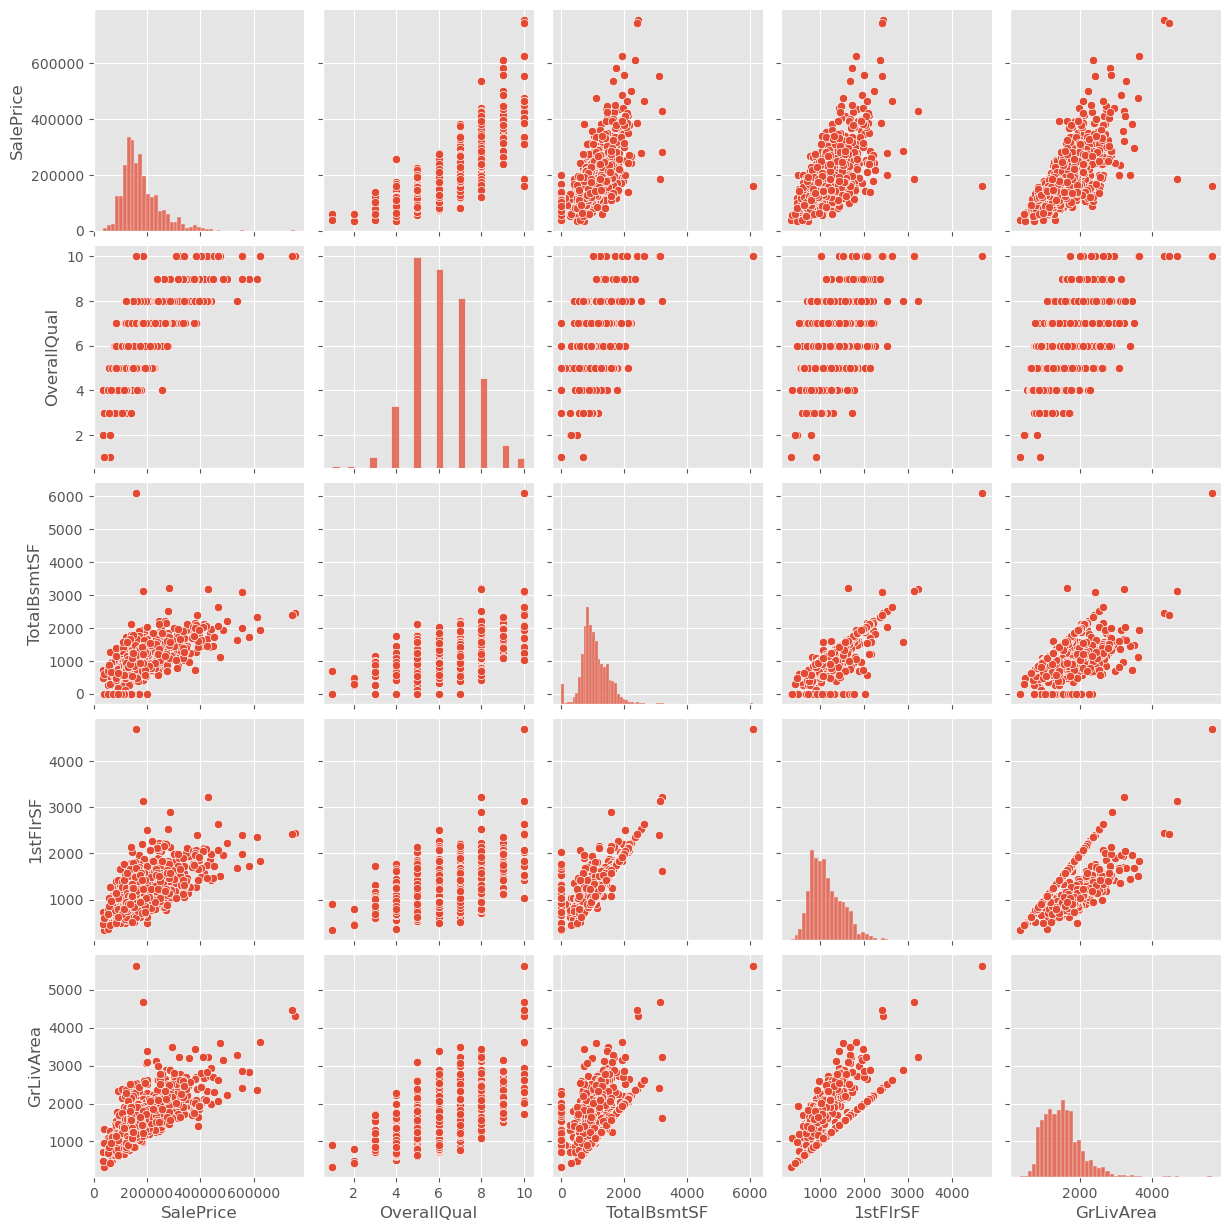

In [37]:
plt.figure(figsize = (18,10)) 
sns.pairplot(df[['SalePrice','OverallQual','TotalBsmtSF', '1stFlrSF', 'GrLivArea']])
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

<Figure size 1800x1000 with 0 Axes>

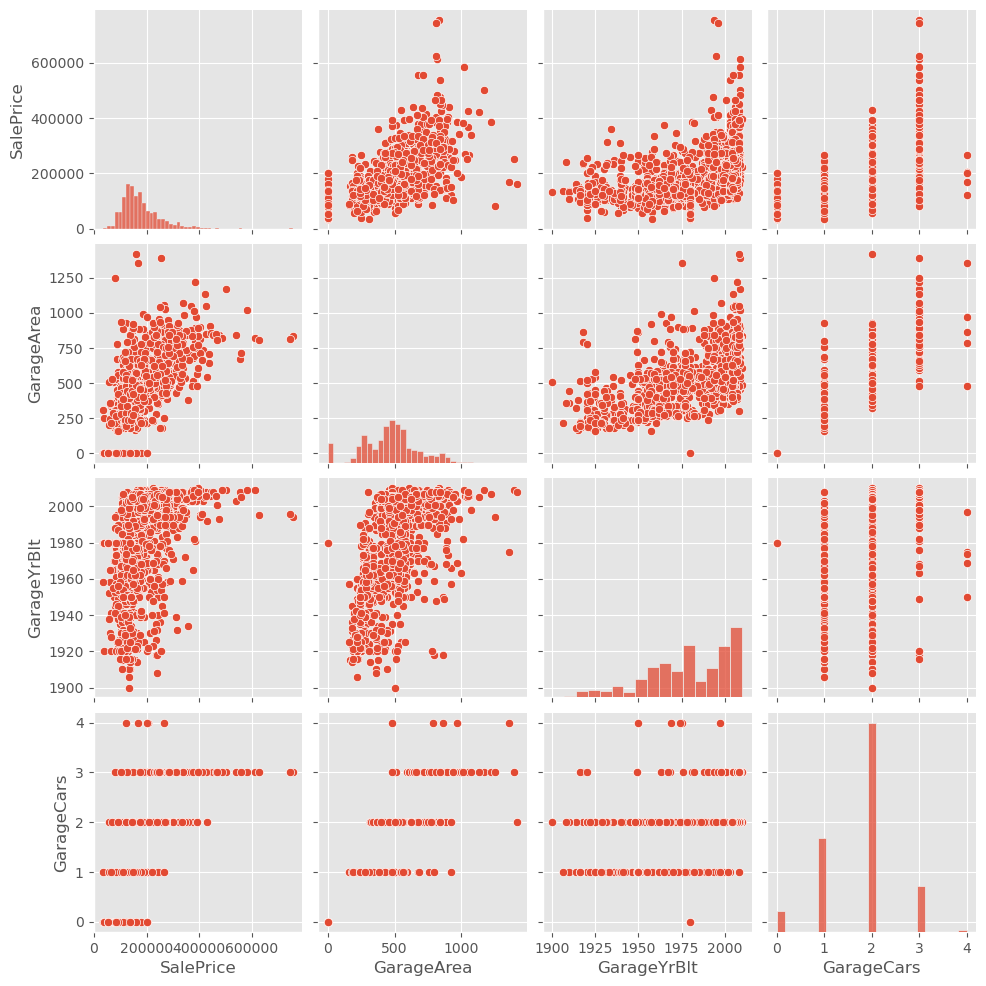

In [38]:
plt.figure(figsize = (18,10)) 
sns.pairplot(df[['SalePrice','GarageArea','GarageYrBlt','GarageCars','YearBuilt','YearRemodAdd']])
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

Attributes such as OverQual, GrLivArea, GarageCars, GarageArea, FullBath, and a few other variables correlate with the other dependant variable & SalePrice we will treat considering the business domain.

In [39]:
print(datastyle.start+'1.  MSZoning      :'+ datastyle.end, df['MSZoning'].unique())
print(datastyle.start+'2.  Street        :'+ datastyle.end, df['Street'].unique())
print(datastyle.start+'3.  LotShape      :'+ datastyle.end, df['LotShape'].unique())
print(datastyle.start+'4.  LandContour   :'+ datastyle.end, df['LandContour'].unique())
print(datastyle.start+'5.  Utilities     :'+ datastyle.end, df['Utilities'].unique())
print(datastyle.start+'6.  LotConfig     :'+ datastyle.end, df['LotConfig'].unique())
print(datastyle.start+'7.  LandSlope     :'+ datastyle.end, df['LandSlope'].unique())
print(datastyle.start+'8.  Neighborhood  :'+ datastyle.end, df['Neighborhood'].unique())
print(datastyle.start+'9.  Condition1    :'+ datastyle.end, df['Condition1'].unique())
print(datastyle.start+'10. Condition2    :'+ datastyle.end, df['Condition2'].unique())
print(datastyle.start+'11. BldgType      :'+ datastyle.end, df['BldgType'].unique())
print(datastyle.start+'12. HouseStyle    :'+ datastyle.end, df['HouseStyle'].unique())
print(datastyle.start+'13. RoofStyle     :'+ datastyle.end, df['RoofStyle'].unique())
print(datastyle.start+'14. RoofMatl      :'+ datastyle.end, df['RoofMatl'].unique())
print(datastyle.start+'15. Exterior1st   :'+ datastyle.end, df['Exterior1st'].unique())
print(datastyle.start+'16. Exterior2nd   :'+ datastyle.end, df['Exterior2nd'].unique())
print(datastyle.start+'17. MasVnrType    :'+ datastyle.end, df['MasVnrType'].unique())
print(datastyle.start+'18. ExterQual     :'+ datastyle.end, df['ExterQual'].unique())
print(datastyle.start+'19. ExterCond     :'+ datastyle.end, df['ExterCond'].unique())
print(datastyle.start+'20. Foundation    :'+ datastyle.end, df['Foundation'].unique())
print(datastyle.start+'21. BsmtQual      :'+ datastyle.end, df['BsmtQual'].unique())
print(datastyle.start+'22. BsmtExposure  :'+ datastyle.end, df['BsmtExposure'].unique())
print(datastyle.start+'23. Heating       :'+ datastyle.end, df['Heating'].unique())
print(datastyle.start+'24. HeatingQC     :'+ datastyle.end, df['HeatingQC'].unique())
print(datastyle.start+'25. CentralAir    :'+ datastyle.end, df['CentralAir'].unique())
print(datastyle.start+'26. Electrical    :'+ datastyle.end, df['Electrical'].unique())
print(datastyle.start+'27. KitchenQual   :'+ datastyle.end, df['KitchenQual'].unique())
print(datastyle.start+'28. Functional    :'+ datastyle.end, df['Functional'].unique())
print(datastyle.start+'29. FireplaceQu   :'+ datastyle.end, df['FireplaceQu'].unique())
print(datastyle.start+'30. GarageType    :'+ datastyle.end, df['GarageType'].unique())
print(datastyle.start+'31. GarageFinish  :'+ datastyle.end, df['GarageFinish'].unique())
print(datastyle.start+'32. GarageCond    :'+ datastyle.end, df['GarageCond'].unique())
print(datastyle.start+'33. PavedDrive    :'+ datastyle.end, df['PavedDrive'].unique())
print(datastyle.start+'34. Fence         :'+ datastyle.end, df['Fence'].unique())
print(datastyle.start+'35. SaleType      :'+ datastyle.end,  df['SaleType'].unique())
print(datastyle.start+'36. SaleCondition :'+ datastyle.end,  df['SaleCondition'].unique())   

1.  MSZoning      : ['RL' 'RM' 'C (all)' 'FV' 'RH']
2.  Street        : ['Pave' 'Grvl']
3.  LotShape      : ['Reg' 'IR1' 'IR2' 'IR3']
4.  LandContour   : ['Lvl' 'Bnk' 'Low' 'HLS']
5.  Utilities     : ['AllPub' 'NoSeWa']
6.  LotConfig     : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
7.  LandSlope     : ['Gtl' 'Mod' 'Sev']
8.  Neighborhood  : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
9.  Condition1    : ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
10. Condition2    : ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
11. BldgType      : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
12. HouseStyle    : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
13. RoofStyle     : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
14. RoofMatl     

In [40]:
# Convert No Basement, No Fireplace, No Garge = 0, Po = 1, Fa = 1, TA = 1, Gd = 1  and Ex = 1

print(datastyle.start+"Column Names : ExterQual; ExterCond; ExterQual; BsmtQual; HeatingQC; KitchenQual; FireplaceQu; and GarageCond:-")
print(datastyle.start+"Convertded No Basement, No Fireplace, No Garge = 0, Po = 1, Fa = 1, TA = 1, Gd = 1  and Ex = 1."+ datastyle.end); Line_Separator1()

def replace_name(x,y):
    df['ExterQual'].replace(x,y, inplace=True)
    df['ExterCond'].replace(x,y, inplace=True)
    df['ExterQual'].replace(x,y, inplace=True)
    df['BsmtQual'].replace(x,y, inplace=True)
    df['HeatingQC'].replace(x,y, inplace=True)
    df['KitchenQual'].replace(x,y, inplace=True)
    df['FireplaceQu'].replace(x,y, inplace=True)
    df['GarageCond'].replace(x,y, inplace=True)
    
replace_name("No Basement",0)
replace_name("No Fireplace", 0)
replace_name("No Garage", 0)
replace_name("Po", 1)
replace_name("Fa", 1)
replace_name("TA", 1)
replace_name("Gd", 1)
replace_name("Ex", 1)

print(datastyle.start+"Converted ExterQual, ExterCond, ExterQual, BsmtQual, HeatingQC, KitchenQual, FireplaceQu,& GarageCond from integer to categorical variables"+ datastyle.end)

df['ExterQual'] = df['ExterQual'].astype('object')
df['ExterCond'] = df['ExterCond'].astype('object')
df['ExterQual'] = df['ExterQual'].astype('object')
df['BsmtQual'] = df['BsmtQual'].astype('object')
df['HeatingQC'] = df['HeatingQC'].astype('object')
df['KitchenQual'] = df['KitchenQual'].astype('object')
df['FireplaceQu'] = df['FireplaceQu'].astype('object')
df['GarageCond']= df['GarageCond'].astype('object')

Column Names : ExterQual; ExterCond; ExterQual; BsmtQual; HeatingQC; KitchenQual; FireplaceQu; and GarageCond:-
Convertded No Basement, No Fireplace, No Garge = 0, Po = 1, Fa = 1, TA = 1, Gd = 1  and Ex = 1.
**************************************************************************************************** 

Converted ExterQual, ExterCond, ExterQual, BsmtQual, HeatingQC, KitchenQual, FireplaceQu,& GarageCond from integer to categorical variables


In [41]:
# Convert No Basement  = 0, No (No Exposure) = 1, Mn = 1, Av = 1, and Gd=1

print(datastyle.start+"Column Name : BsmtExposure:-")
print(datastyle.start+"Converted No Basement = 0, No (No Exposure) = 1, Mn = 1, Av = 1, and Gd = 1."+ datastyle.end); Line_Separator1()

def replace_name(x,y):
    df['BsmtExposure'].replace(x,y, inplace=True)

replace_name("No Basement",0)
replace_name("No", 0)
replace_name("Mn", 1)
replace_name("Av", 1)
replace_name("Gd", 1)

print(datastyle.start+"Converted BsmtExposure from integer to categorical variables"+ datastyle.end)

df['BsmtExposure']=df['BsmtExposure'].astype('object')

Column Name : BsmtExposure:-
Converted No Basement = 0, No (No Exposure) = 1, Mn = 1, Av = 1, and Gd = 1.
**************************************************************************************************** 

Converted BsmtExposure from integer to categorical variables


In [42]:
# Convert Maj2 = 0, Mod: 1, Maj1,Min2 and Min1= 1  Sev =1,  Typ = 1

print(datastyle.start+"Column Name : Functional:-")
print(datastyle.start+"Converted Maj2 = 0, Mod: 1, Maj1, Min2 and Min1 = 1 Sev =1,and Typ = 1."+ datastyle.end); Line_Separator1()
def replace_name(x,y):
    df['Functional'].replace(x,y, inplace=True)
    
replace_name("Sev",3)
replace_name("Maj2", 0)
replace_name("Maj1", 2)
replace_name("Mod", 1)
replace_name("Min2", 2)
replace_name("Min1", 2)
replace_name("Typ", 4)

print(datastyle.start+"Converted Functional from integer to categorical variables"+ datastyle.end)

df['Functional']=df['Functional'].astype('object')

Column Name : Functional:-
Converted Maj2 = 0, Mod: 1, Maj1, Min2 and Min1 = 1 Sev =1,and Typ = 1.
**************************************************************************************************** 

Converted Functional from integer to categorical variables


In [44]:
# Convert No Garage = 0, Unf , RFn  Fin = 1

print(datastyle.start+"Column Name : GarageFinish:-")
print(datastyle.start+"Converted No Garage = 0, Unf, RFn, and Fin = 1."+ datastyle.end); Line_Separator1()
def replace_name(x,y):
    df['GarageFinish'].replace(x,y, inplace=True)
    
replace_name("No Garage",0)
replace_name("Unf", 1)
replace_name("RFn", 1)
replace_name("Fin", 1)

print(datastyle.start+"Converted GarageFinish from integer to categorical variables"+ datastyle.end)
df['GarageFinish']=df['GarageFinish'].astype('object')

Column Name : GarageFinish:-
Converted No Garage = 0, Unf, RFn, and Fin = 1.
**************************************************************************************************** 

Converted GarageFinish from integer to categorical variables


In [45]:
# Replace No Fence =0, MnWw = 1, GdWo = 1,  MnPrv = 1,  and GdPrv = 1

print(datastyle.start+"Column Name : Fence:-")
print(datastyle.start+"Converted No Fence =0, MnWw = 1, GdWo = 1,  MnPrv = 1,  and GdPrv = 1."+ datastyle.end); Line_Separator1()
def replace_name(x,y):
    df['Fence'].replace(x,y, inplace=True)
    
replace_name("No Fence",0)
replace_name("MnWw", 1)
replace_name("GdWo", 1)
replace_name("MnPrv", 1)
replace_name("GdPrv", 1)

print(datastyle.start+"Converted Fence from integer to categorical variables"+ datastyle.end)
df['Fence']=df['Fence'].astype('object')

Column Name : Fence:-
Converted No Fence =0, MnWw = 1, GdWo = 1,  MnPrv = 1,  and GdPrv = 1.
**************************************************************************************************** 

Converted Fence from integer to categorical variables


In [46]:
# Replace y =1 and N =0

print(datastyle.start+"Column Name : CentralAir:-")
print(datastyle.start+"Converted Y =1 and N =0."+ datastyle.end); Line_Separator1()
def replace_name(x,y):
    df['CentralAir'].replace(x,y, inplace=True)
    
replace_name("Y",1)
replace_name("N", 0)

print(datastyle.start+"Converted CentralAir from integer to categorical variables"+ datastyle.end)
df['CentralAir']=df['CentralAir'].astype('object')

Column Name : CentralAir:-
Converted Y =1 and N =0.
**************************************************************************************************** 

Converted CentralAir from integer to categorical variables


In [47]:
# Replace AllPub =1 and NoSewa =0

print(datastyle.start+"Column Name : Utilities:-")
print(datastyle.start+"Converted AllPub =1 and NoSewa =0"+ datastyle.end); Line_Separator()
def replace_name(x,y):
    df['Utilities'].replace(x,y, inplace=True)
    
replace_name("AllPub",1)
replace_name("NoSeWa", 0)

print(datastyle.start+"Converted Utilities from integer to categorical variables"+ datastyle.end)
df['Utilities']=df['Utilities'].astype('object')

Column Name : Utilities:-
Converted AllPub =1 and NoSewa =0
************************************************** 

Converted Utilities from integer to categorical variables


In [48]:
# Replace Pave = 2 and Grvl =1

print(datastyle.start+"Column Name : Street:-")
print(datastyle.start+"Converted Pave = 2, and Grvl =1"+ datastyle.end); Line_Separator1()

def replace_name(x,y):
    df['Street'].replace(x,y, inplace=True)
    
replace_name("Grvl", 1)
replace_name("Pave",2)

print(datastyle.start+"Converted Street from integer to categorical variables"+ datastyle.end)
df['Street']=df['Street'].astype('object')

Column Name : Street:-
Converted Pave = 2, and Grvl =1
**************************************************************************************************** 

Converted Street from integer to categorical variables


In [49]:
print(datastyle.start+"Dropped columns: 'ScreenPorch','3SsnPorch','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'"+ datastyle.end)
df=df.drop(['ScreenPorch','3SsnPorch','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1)

Dropped columns: 'ScreenPorch','3SsnPorch','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'


In [50]:
# Split into X and y
X = df
y = np.log(X.SalePrice)

# drop sale price from X
X = X.drop("SalePrice",1)

In [51]:
# Creating dummy variables for categorical variables

# Subset all categorical variables
df_categorical = X.select_dtypes(include=['object'])
df_categorical.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,RL,2,Reg,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001-2010,2001-2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,1,1,PConc,1,0,GasA,1,1,SBrkr,1,4,0,Attchd,1,1,Y,0,WD,Normal
1,RL,2,Reg,Lvl,1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1950-1975,1950-1975,Gable,CompShg,MetalSd,MetalSd,None,1,1,CBlock,1,1,GasA,1,1,SBrkr,1,4,1,Attchd,1,1,Y,0,WD,Normal


In [53]:
print(datastyle.start+"df_categorical :"+ datastyle.end, df_categorical.shape)

df_categorical : (1460, 38)


In [54]:
# Convert into dummies
df_dummies = pd.get_dummies(df_categorical, drop_first=True)
df_dummies.head(2)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_2,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_1,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,FireplaceQu_1,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_1,GarageCond_1,PavedDrive_P,PavedDrive_Y,Fence_1,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [55]:
# Remove categorical variables
X = X.drop(list(df_categorical.columns), axis=1)

In [56]:
# Combine dummy variables 
X = pd.concat([X, df_dummies], axis=1)

In [57]:
print(datastyle.start+"X :"+ datastyle.end, X.shape)

X : (1460, 197)


In [58]:
X.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,FireplaceQu_1,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_1,GarageCond_1,PavedDrive_P,PavedDrive_Y,Fence_1,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65,8450,7,5,196,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,...,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80,9600,6,8,0,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,...,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 197 entries, MSSubClass to SaleCondition_Partial
dtypes: int64(29), uint8(168)
memory usage: 570.4 KB


In [60]:
# scaling the features
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [61]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [62]:
# Linear regression
lm = LinearRegression()
lm.fit(X_train, y_train)

# Predict
y_train_pred = lm.predict(X_train)
print(datastyle.start+'y_train_pred:'+ datastyle.end, r2_score(y_true=y_train, y_pred=y_train_pred)*100)
y_test_pred = lm.predict(X_test)
print(datastyle.start+'y_test_pred :'+ datastyle.end,  r2_score(y_true=y_test, y_pred=y_test_pred)*100)

y_train_pred: 94.89947461310855
y_test_pred : 86.66392264067234


**Ridge and Lasso Regression**

Now, let's proceed to predict house sales prices using a dataset suitable for simple linear regression. We will further explore ridge and lasso regression techniques for this prediction task.

**Ridge Regression**

In [63]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [64]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010136,0.006035,0.003550,0.000305,0.0001,{'alpha': 0.0001},-0.088813,-0.098003,-0.098282,-0.104916,-0.087792,-0.095561,0.006431,21,-0.063621,-0.064423,-0.063104,-0.064656,-0.063782,-0.063917,0.000560
1,0.006438,0.000725,0.002939,0.000132,0.001,{'alpha': 0.001},-0.088713,-0.097990,-0.098319,-0.104534,-0.087704,-0.095452,0.006365,17,-0.063686,-0.064430,-0.063123,-0.064682,-0.063831,-0.063950,0.000554


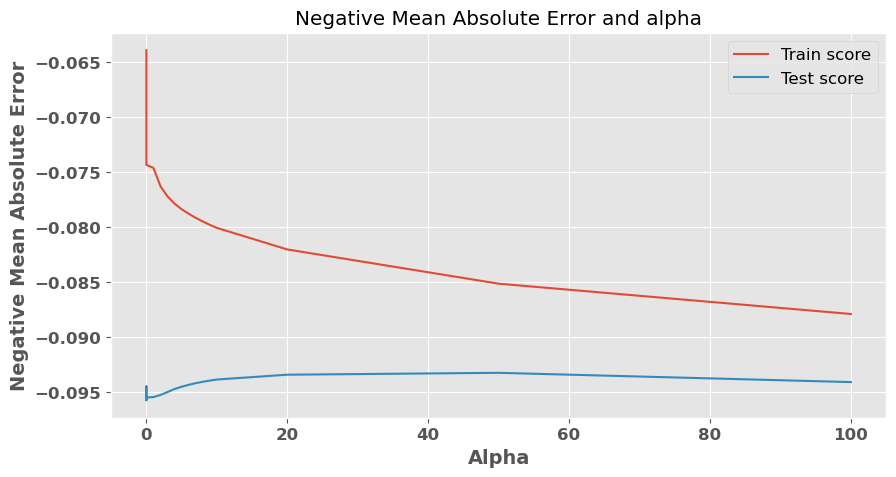

In [65]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize = (10,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha',fontsize=14, fontweight='bold')
plt.ylabel('Negative Mean Absolute Error',fontsize=14, fontweight='bold')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['Train score', 'Test score'],fontsize=12, loc='upper right')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

In [66]:
# Checking the value of optimum number of parameters
print(datastyle.start+"Ridge, best_params_:"+ datastyle.end,model_cv.best_params_)
print(datastyle.start+"Ridge, best_score_ :"+ datastyle.end, model_cv.best_score_)

Ridge, best_params_: {'alpha': 50}
Ridge, best_score_ : -0.09323854297591763


In [67]:
alpha =50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-5.86906426e-04, -2.09648479e-04,  1.40285254e-06,  7.70540392e-02,
        3.77182675e-02,  1.12667811e-05,  5.34507703e-05,  7.11122908e-05,
        7.31316489e-05, -9.97304233e-06,  1.34270898e-04,  6.68269616e-02,
        1.16266628e-02,  3.10020467e-02,  2.61373061e-02,  5.35545145e-03,
       -1.76676894e-02,  7.62839518e-03,  1.92100124e-02,  6.42475672e-04,
        4.48560733e-02,  6.51373207e-05,  1.04709232e-04, -6.69802616e-05,
        2.80832985e-05, -5.92914793e-04, -6.58728742e-06, -1.28711023e-03,
       -6.55408514e-03,  2.97182745e-02,  7.00276125e-03,  3.58770385e-02,
       -2.81985083e-02,  8.21362868e-03,  1.32321937e-02, -1.97746882e-02,
       -3.33391768e-03,  1.47440191e-02,  1.85166006e-02,  2.06806200e-02,
        2.05170830e-03,  2.42553287e-02, -9.60795983e-03, -7.57812783e-04,
        5.51424339e-04,  1.86198937e-02, -8.52428603e-04, -8.72713950e-04,
       -8.28537535e-03,  6.54624159e-03,  2.67743809e-02, -1.17772414e-02,
        4.61169797e-02, -

In [68]:
# Model with optimal alpha
# Ridge regression

lm0 = Ridge(alpha=50)
lm0.fit(X_train, y_train)


y_train_pred = lm0.predict(X_train)
y_test_pred = lm0.predict(X_test)


# New Code for R2
r_square_score=r2_score(y_test,y_test_pred)

print(datastyle.start+'R Square score:'+ datastyle.end, r_square_score*100)

R Square score: 87.57389582486181


In [69]:
# AIC and BIC Calculation

n= 1460 # n is equal to the total data points on which model is built
k= 36 # k is similar to the number of predictor variables in a model built

resid=np.subtract(y_test_pred,y_test)
rss=np.sum(np.power(resid,2))
rss=np.exp(rss)
print(datastyle.start+'RSS:'+ datastyle.end, rss)

aic=n*np.log(rss/n)+2*k
print(datastyle.start+'AIC:'+ datastyle.end, aic)

bic=n*np.log(rss/n)+k*np.log(n)
print(datastyle.start+'BIC:'+ datastyle.end, bic)

RSS: 7748.973910005746
AIC: 2508.921040249064
BIC: 2699.2239419783496


In [70]:
# Lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(datastyle.start+'Ridge:y_train_pred :'+ datastyle.end, metrics.r2_score(y_true=y_train, y_pred=y_train_pred)*100)

y_test_pred = ridge.predict(X_test)
print(datastyle.start+'Ridge:y_test_pred  :'+ datastyle.end,metrics.r2_score(y_true=y_test, y_pred=y_test_pred)*100)

Ridge:y_train_pred : 89.54852258907316
Ridge:y_test_pred  : 87.57389582486181


Ridge regression demonstrates a prediction capability with an accuracy of 87.57%. Additionally, the R-squared (R2) metric helps explain the proportion of variation in the house sale price that can be attributed to the predictor variables.

In [71]:
scores_ridge = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
print(datastyle.start+"Scores Ridge Cross-validation :"+ datastyle.end, scores_ridge)

Scores Ridge Cross-validation : [0.88703053 0.73481128 0.83132174 0.90312539 0.90992624]


In [72]:
print(datastyle.start+"Accuracy_ridge_crossvalidation: %0.2f (+/- %0.2f)"% (scores_ridge.mean(), scores_ridge.std() * 2)+ datastyle.end )

Accuracy_ridge_crossvalidation: 0.85 (+/- 0.13)


In [73]:
# The other way of doing the same thing (more explicit) using KFold

folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores_ridge_KFold = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=folds)
print(datastyle.start+'Scores Ridge kFold Cross-validation :'+ datastyle.end,  scores_ridge_KFold)

Scores Ridge kFold Cross-validation : [0.73017793 0.82373633 0.91063653 0.87528296 0.89703497]


In [74]:
print(datastyle.start+'Neg_Mean_Squred_Error_Cross-validation_Ridge :'+ datastyle.end, cross_val_score(Ridge(), X_train, y_train, scoring="neg_mean_squared_error", cv = 5))

Neg_Mean_Squred_Error_Cross-validation_Ridge : [-0.01657323 -0.04398283 -0.02694505 -0.01470936 -0.01517751]


In [75]:
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
print(datastyle.start+'RMSE_Ridge :' + datastyle.end, rmse_ridge)
print(datastyle.start+'RMSE is    : '+ datastyle.end, mean_squared_error(y_test, y_test_pred))

RMSE_Ridge : [0.12873706 0.20972083 0.16414946 0.12128215 0.12319703]
RMSE is    :  0.020445926289664323


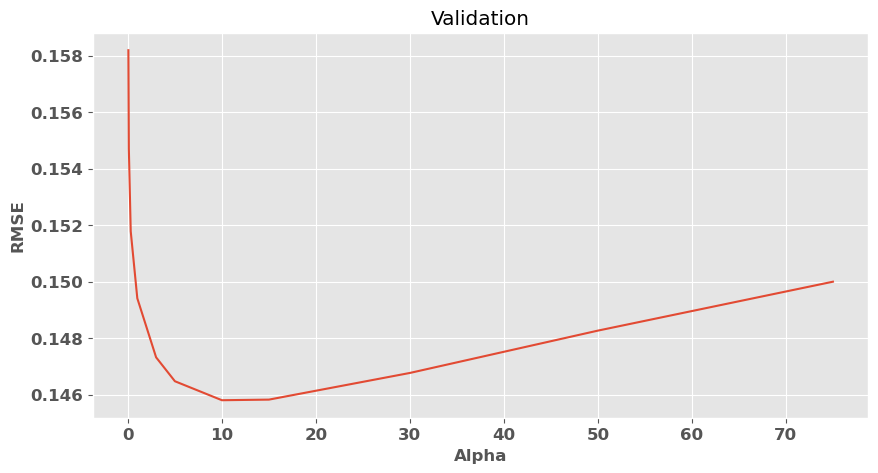

In [76]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
plt.figure(figsize = (10,5))
cv_ridge.plot(title = "Validation")
plt.xlabel("Alpha",fontsize=12, fontweight='bold')
plt.ylabel("RMSE",fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()

In [77]:
print(datastyle.start+"CV_Ridge.min() :"+ datastyle.end, cv_ridge.min())

CV_Ridge.min() : 0.14580995692542875


In [78]:
coef = pd.Series(ridge.coef_, index = X_train.columns)
coef.sort_values(ascending=False).head(30)

OverallQual               0.077054
BsmtFullBath              0.066827
Neighborhood_NridgHt      0.048500
Condition1_Norm           0.046437
Neighborhood_Crawfor      0.046117
GarageCars                0.044856
Neighborhood_Somerst      0.039400
CentralAir_1              0.038360
OverallCond               0.037718
Foundation_PConc          0.037655
MSZoning_RL               0.035877
YearRemodAdd_1991-2000    0.033750
BsmtExposure_1            0.033337
FullBath                  0.031002
FireplaceQu_1             0.030736
Exterior1st_BrkFace       0.029782
MSZoning_FV               0.029718
GarageType_Attchd         0.028845
SaleCondition_Normal      0.027706
Neighborhood_ClearCr      0.026774
YearBuilt_2001-2010       0.026702
HalfBath                  0.026137
YearRemodAdd_2001-2010    0.025738
SaleType_New              0.024361
SaleCondition_Partial     0.024361
LotConfig_CulDSac         0.024255
PavedDrive_Y              0.022923
YearBuilt_1991-2000       0.022483
Functional_4        

In [79]:
print(datastyle.start+"Ridge picked- "+ datastyle.end + str(sum(coef != 0)) + datastyle.start+" variables; and eliminated the other " + datastyle.end +  str(sum(coef == 0)) + datastyle.start+" variables"+ datastyle.end)

Ridge picked- 194 variables; and eliminated the other 3 variables


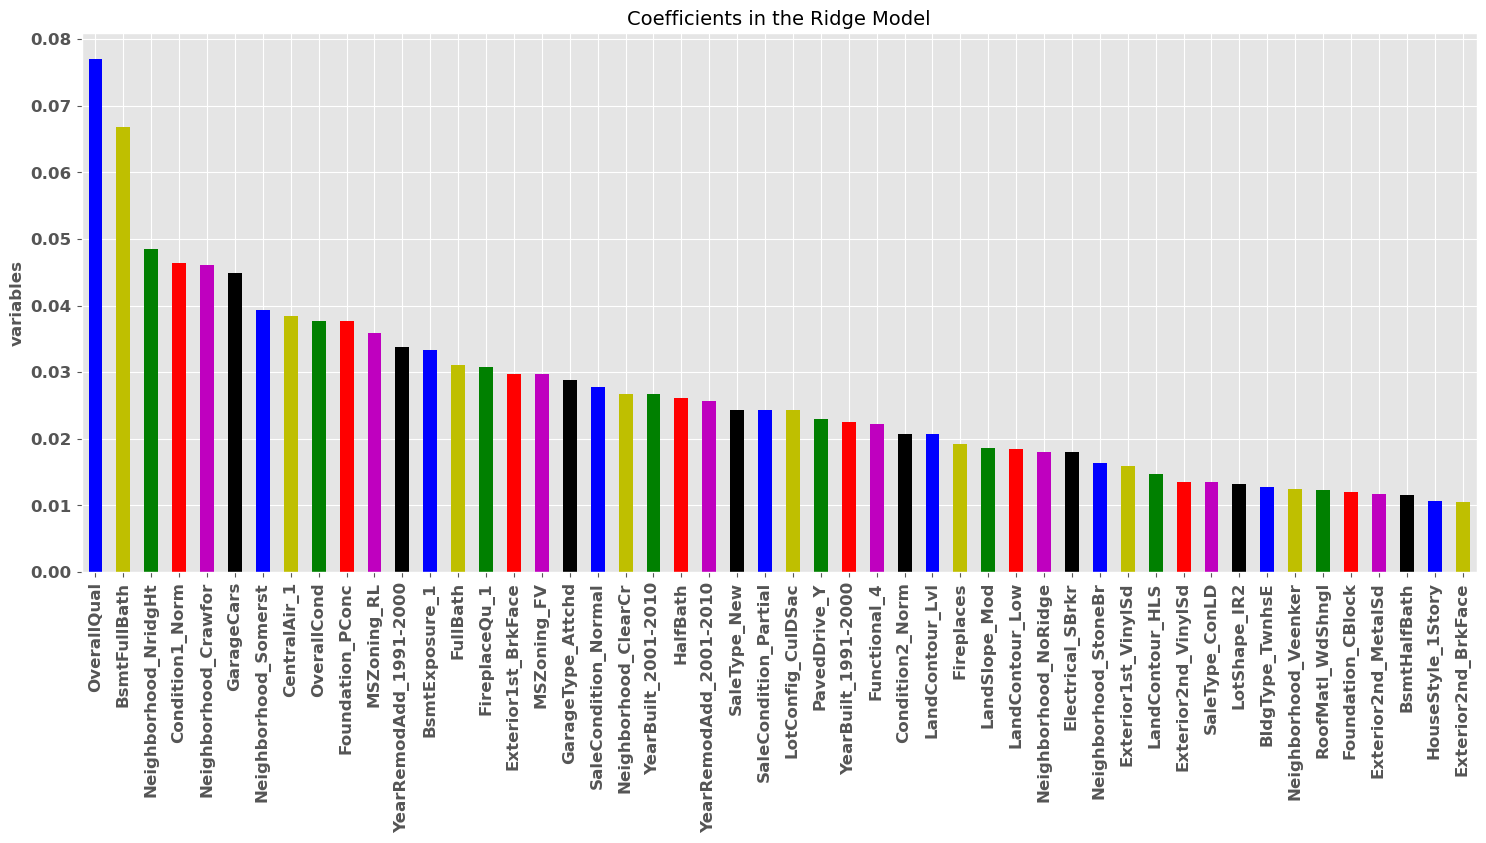

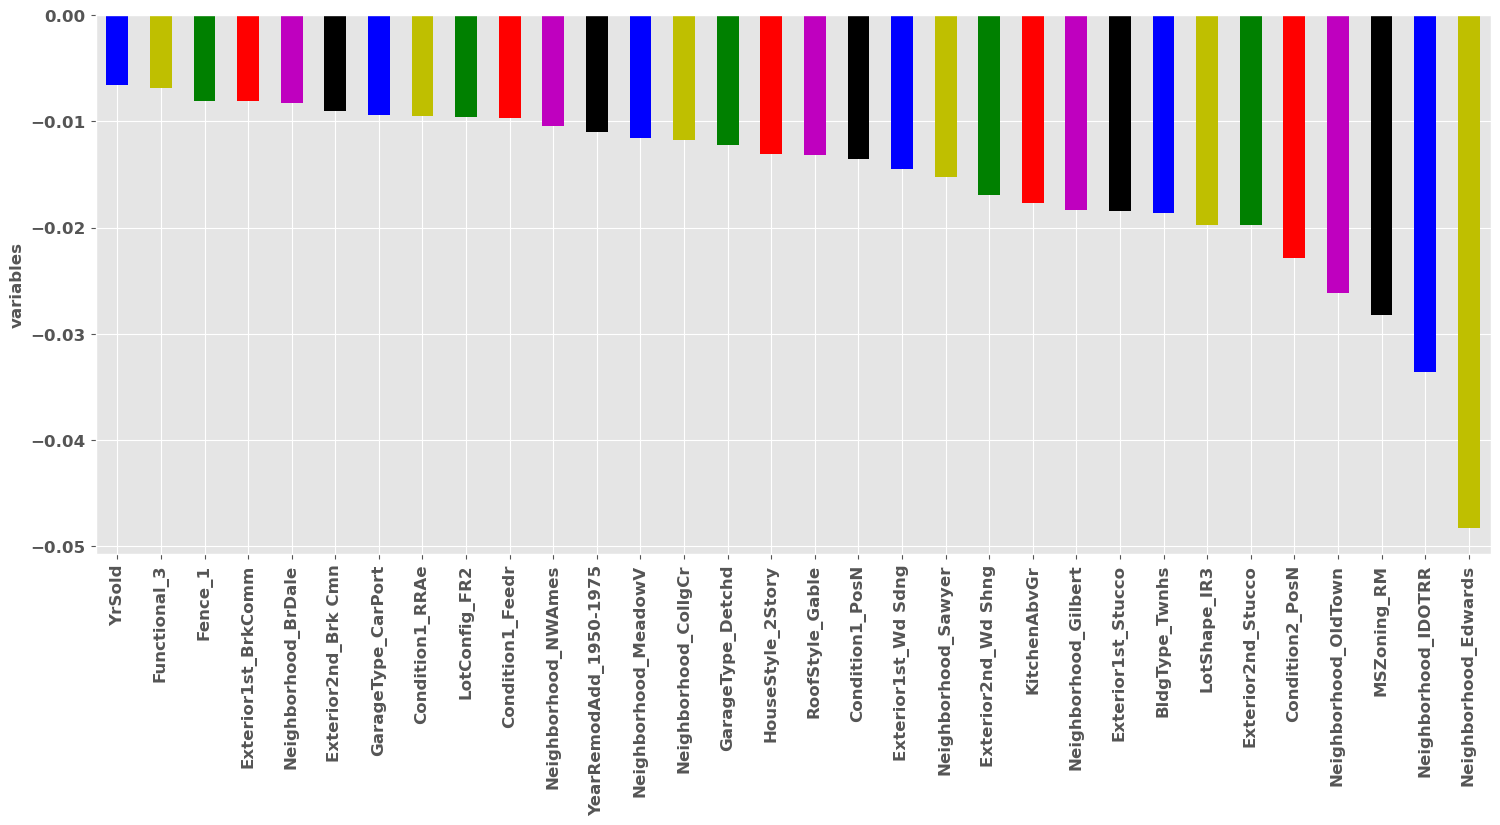

In [80]:
plt.figure(figsize=(18,7))
coef.sort_values(ascending=False).head(50).plot(kind='bar', fontsize=12, color=['b','y', 'g', 'r', 'm', 'k'])
plt.title('Coefficients in the Ridge Model', fontsize=14)
plt.ylabel('variables', fontsize=12,fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()


plt.figure(figsize=(18,7))
coef.sort_values(ascending=False).tail(32).plot(kind='bar', fontsize=12, color=['b','y', 'g', 'r', 'm', 'k'])
# plt.title('Coefficients in the Ridge Model', fontsize=14)
plt.ylabel('variables', fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.show()